### Final Project Notebook
### Heart Disease Prediction
### Group 7 
### Students:  
### Edward Riveros Ruiz  email:  edwarding7703@gmail.com
### Eric Vistnes email: evistnes23@gmail.com 
### Lesley Bosniack email: lbosniack@gmail.com
### Smruthi Iyengar email: smruthi.s.iyengar@gmail.com
### June 12, 2021

In [1]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import math
import time
import statsmodels.api as sm


import missingno as msno  #Identification of missing valus for each variable
from sklearn.linear_model import LogisticRegression, Perceptron #Logistic Regression
from sklearn.metrics import confusion_matrix #Confusion Matrix
from sklearn.neighbors import KNeighborsClassifier #K Nearest Neighbors
from sklearn.naive_bayes import GaussianNB #Gaussian Naive Bayes classifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV #Grid Search optimizing hyper-parameters
from sklearn import preprocessing #Preprocessing
from sklearn.preprocessing import StandardScaler #Standardization

from sklearn.model_selection import cross_val_score #Cross Validation Metrics
from sklearn.model_selection import StratifiedKFold #Stratified Cross Validation
from sklearn.tree import DecisionTreeClassifier  #Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier, plot_tree #Tree Plotting
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier #Boosting and Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC #Support Vector Classification
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.decomposition import KernelPCA


In [2]:
#Utility Functions

def print_results(results):
    #Prints results of grid search.  "results" is the GridSearchCV.
    print("Best Parameters:  {}\n".format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3), round(std * 2,3), params))
        
def specificity(confusion_matrix):
    #Calculates specificity from a confusion matrix. Input is the confusion matrix from a classification model.
    tn = confusion_matrix[0][0]
    fp = confusion_matrix[0][1]
    fn = confusion_matrix[1][0]
    tp = confusion_matrix[1][1]
    specificity = tn/(tn+fp)
    print('Specificity: ', round(specificity,3))
    
def plot_feature_importances(model, df):
    #Plots a barchart of features according to their importance in a model.
    n_features = df.shape[1]
    df_colnames= df.columns
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df_colnames)
    plt.xlabel("Feature importance")
    plt.ylim(-1, n_features)

def modelOutput(y_train_actual,y_train_pred, y_val_actual,y_val_pred):
    #Calculates and prints model output including confusion matrix for validation set, sensitivity (recall) scores for training and validation
    #and classification report for validation set.
    #Accepts actual and predicted training and valuation target variables.
    confusion_matrix = pd.crosstab(index = y_val_actual, columns = y_val_pred.ravel(), rownames=['Expected'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
    plt.title("Classification Matrix for Validation Data", fontsize = 15)
    plt.show()
    print("Training Sensitivity      ", round(metrics.recall_score(y_train_actual, y_train_pred),3))
    print("Valuation Sensitivity     ", round(metrics.recall_score(y_val_actual, y_val_pred),3), '\n')
    print(metrics.classification_report(y_val_actual, y_val_pred))
    specificity(confusion_matrix)
    
def finalOutput(y_train_actual, y_train_pred, y_val_actual, y_val_pred, y_test_actual, y_test_pred):
    #Calculates model output including confusion matrix for test set, sensitivity (recall) scores for all sets, 
    #and classification report for test set.
    #Accepts actual and predicted training, valuation, and test target variables.  
    print("Training Sensitivity:   ", round(metrics.recall_score(y_train_actual, y_train_pred),3))
    print("Valuation Sensitivity:  ", round(metrics.recall_score(y_val_actual, y_val_pred),3))
    print("Test Sensitivity:       ", round(metrics.recall_score(y_test_actual, y_test_pred),3), '\n')
    confusion_matrix = pd.crosstab(index = y_test_actual, columns = y_test_pred.ravel(), rownames=['Expected'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
    plt.title("Classification Matrix for Test Data", fontsize = 15)
    plt.show()
    print("Test Results:", metrics.classification_report(y_test_actual, y_test_pred))
    specificity(confusion_matrix)

# Abstract

Heart Disease is the leading cause of death in the United States, causing 1 out of 4 deaths. Early and on-time diagnosis of the disease is essential to prevent the disease from progressing too far. This study investigates the key factors in identifying the presence of Health Disease. Specifically, we investigated the linkage between both Chest Pain and Cholesterol levels to Heart Disease, as well as between Cholesterol levels resting blood pressure. In addition to simply predicting Heart Disease, we could find if certain factors appear together.

To test which of the various factors help predict Heart Disease, we created Logistic Regression, Decision Tree Classification, and Random Forest Classification models in order to extract feature importance and coefficients. We created performative models with strong Sensitivity and Accuracy scores to extract the most important features. Additionally, we ran AdaBoost, GradientBoost, and Support Vector Machine ("SVM") models to find the most performative classification model. The results showed that Chest Pain and Exercise-Induced Angina were some of the most important factors, followed by age and the number of major vessels colored by fluoroscopy.

The results of our models show that it is possible to predict the presence of Heart Disease in patients, and there are factors that we can focus on to more strongly indicate a positive case.

# Introduction

Heart Disease is the leading cause of death in the United States and many other developed and developing nations. In the United States, it causes 1 out of 4 deaths. Many patients do not catch the disease until it is too late, so it is important to have a method of predicting Heart Disease before it advances to a deadly stage. We aim to predict instances of the disease with machine learning classification techniques, as well as to extract which factors most strongly indicate a positive case. 

In addition to building a performative model and extracting the feature importance, we also seek to answer other questions about the underlying factors of Heart Disease, namely, 

*  Is there any relationship between chest pain types and any stage of Heart Disease?
*  Is there any difference in cholesterol levels in relation to whether someone has Heart Disease?
*  Is there any association between cholesterol and resting blood pressure at admission?

We explore all of these questions in this project to better understand the factors that indicate Heart Disease and how they relate to one another.

The data is collected from multiple datasets from the Cleveland Clinic Foundation, the Hungarian Institute of Cardiology, the University Hospital in Zurich and Basil Switzerland, and the VA Medical Center in Long Beach. According to Kaggle, the Cleveland data is the only one used by machine learning researchers thus far, which means the area for growth in this field is large. Based on our project, we can see that the location that the data is gathered is one of the more important factors in indicating presence of the disease potentially suggesting that differences in medical training and protocol, cultural, and geographical differences could be at play. The importance of the dataset location means that exploring the data from each location can uncover import factors that haven't been found yet.

If using data from additional datasets or exploring the data in new manners can create a more predictive model or prove a stronger feature importance than previously thought, we can improve how Heart Disease is detected and treated. If the results of our study also vary greatly from previously understood norms, it would indicate that previous beliefs used in Machine Learning about Heart Disease have been biased based on the limited data that was previously used.

# Data Description

In this project, we will be working with the **UCI Heart Disease dataset**, which contains 920 instances, each representing a heart disease patient. 
The dataset can be found on Kaggle, https://www.kaggle.com/redwankarimsony/heart-disease-data.  More details can also be found at https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

Target variable is heart disease level ('num').  All other variables are potential explanatory variables.

In [3]:
# Attribute         Definition                                          Values                                                     Data Type
#
# age               Patient age in years                                28 - 77                                                    Numeric
# origin            Place of study                                      Cleveland, Hungary, Switzerland, Long Beach                Categorical
# sex               Gender                                              Male, Female                                               Categorical
# cp                Chest pain type                                     Asymptomatic, atypical angina, non-angina, typical angina  Categorical
# trestbps          Resting blood pressure at admission                 80 – 200 Mm HG                                             Numeric
# chol              Serum cholesterol                                   85 - 603 Mg/dl                                             Numeric
# fbs               Fasting blood sugar if above 120 mg/dl              False, True                                                Binary
# restecg           Resting electrocardiogram	normal                    stt abnormality, lv hypertrophy                            Categorical
# thalch           Maximum heart rate achieved                         60 – 202 bpm                                               Numeric
# exang             Exercise-induced angina                             False, True                                                Binary
# oldpeak           ST depression induced by exercise relative to rest  (2.6) – 6.2                                                Numeric
# slope             Slope of peak exercise ST segment                   downsloping, flat, upsloping                               Categorical
# ca                Number of major vessels colored by fluoroscopy      0, 1, 2, 3                                                 Numeric
# thal(thalssemia)  Blood disorder                                      Normal, fixed defect, reversible defect                    Categorical
# num (target)      Heart disease finding                               (0 for no disease, Stages 1, 2, 3, 4)                      Categorical

# num: the predicted attribute (0-4).  Zero indicates the absence of heart disease.  1-4 indicates some level of presence of heart disease.
#      The levels 1-4 may be consistent with the American Heart Associations four stages of heart disease:
# Stage A	You don't have heart failure.  But you are at high risk due to having another medical condition that can lead to heart failure,
#      such as high blood pressure, diabetes, obesity or coronary artery disease.
# Stage B	Your heart has been damaged by your other medical condition(s) or other factors, but you don't have any symptoms yet.
# Stage C	Your heart is damaged and you are experiencing heart failure symptoms.
# Stage D	You have severe heart failure that requires specialised care, despite receiving treatment.

# Data Gathering

In [4]:
df = pd.read_csv('heart_disease_uci.csv')  #Reads in the dataset
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
renames = {"cp":"Chest Pain", "trestbps":"Resting Blood Pressure", "chol":"Cholesterol", "fbs":"Fasting Blood Sugar", "restecg":"Resting ECG", "thalch":"Max Heart Rate","exang":"Exercise Angina", "ca":"# of Major Vessels", "thal":"Thalassemia"}
df.rename(columns=renames)

,id,age,sex,dataset,Chest Pain,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Exercise Angina,oldpeak,slope,# of Major Vessels,Thalassemia,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
df.describe()  #Sumary statistics for numeric variables

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


# Data Cleaning and Preprocessing

Slope, ca, and thal have a large amount of missing data (309 missing for slope, 611 for ca, and 486 for thal), so we need to either remove these variables or replace the missing values with the mean, mode, or 0. It is difficult to find the importance of these features, especially with so many missing values.  So for exploratory data analysis, we will convert all our values to Numerical values and temporarily remove all NaN values so that we can compare spearman correlations to tell if the variables should be kept.

We create the data frame df_temp below and remove the missing values so that we can test the correlation between variables without NaN values. We can use this correlation in order to decide if variables with a high proportion of missing values should be kept.  If correlation of these variables to another feature in the dataset is very high, we may consider removing them.

In [7]:
df.isnull().sum()  #Number of cells missing data

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [8]:
#Create a copy of the data
df_temp = df.copy()

In [9]:
#Convert categorical levels to numerical values
df_temp.cp.replace({"asymptomatic": 0, "atypical angina": 1, 'typical angina': 2, 'non-anginal': 3}, inplace=True)
df_temp.sex.replace({"Male":0, "Female":1}, inplace=True)
df_temp.restecg.replace({"lv hypertrophy": 0, "normal": 1, 'st-t abnormality': 2}, inplace=True)
df_temp.slope.replace({"downsloping": 0, "flat": 1, 'upsloping': 2}, inplace=True)
df_temp.thal.replace({"fixed defect": 0, "normal": 1, 'reversable defect': 2}, inplace=True)
df_temp.dataset.replace({'Cleveland': 0,'Hungary': 1, 'Switzerland': 2,'VA Long Beach': 3}, inplace=True)

In [10]:
df_temp.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,0,0,2,145.0,233.0,True,0.0,150.0,False,2.3,0.0,0.0,0.0,0
1,2,67,0,0,0,160.0,286.0,False,0.0,108.0,True,1.5,1.0,3.0,1.0,2
2,3,67,0,0,0,120.0,229.0,False,0.0,129.0,True,2.6,1.0,2.0,2.0,1
3,4,37,0,0,3,130.0,250.0,False,1.0,187.0,False,3.5,0.0,0.0,1.0,0
4,5,41,1,0,1,130.0,204.0,False,0.0,172.0,False,1.4,2.0,0.0,1.0,0


Now that our values are Numerical, we still need to remove the NaN values before we can run our Principal Component Analysis. So we will remove those values to create a temporary DataFrame and check the correlations between variables. We are running PCA in order to test our models with PCA datasets, as well as to see if there is a possibility that we can reduce the dimensionality of our data and remove NaN values at the same time.

In [11]:
df_temp = df_temp.dropna(axis=0)  #remove instances of missing values.
df_temp

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,0,0,2,145.0,233.0,True,0.0,150.0,False,2.3,0.0,0.0,0.0,0
1,2,67,0,0,0,160.0,286.0,False,0.0,108.0,True,1.5,1.0,3.0,1.0,2
2,3,67,0,0,0,120.0,229.0,False,0.0,129.0,True,2.6,1.0,2.0,2.0,1
3,4,37,0,0,3,130.0,250.0,False,1.0,187.0,False,3.5,0.0,0.0,1.0,0
4,5,41,1,0,1,130.0,204.0,False,0.0,172.0,False,1.4,2.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,300,68,0,0,0,144.0,193.0,True,1.0,141.0,False,3.4,1.0,2.0,2.0,2
300,301,57,0,0,0,130.0,131.0,False,1.0,115.0,True,1.2,1.0,1.0,2.0,3
301,302,57,1,0,1,130.0,236.0,False,0.0,174.0,False,0.0,1.0,1.0,1.0,1
508,509,47,0,1,0,150.0,226.0,False,1.0,98.0,True,1.5,1.0,0.0,2.0,1


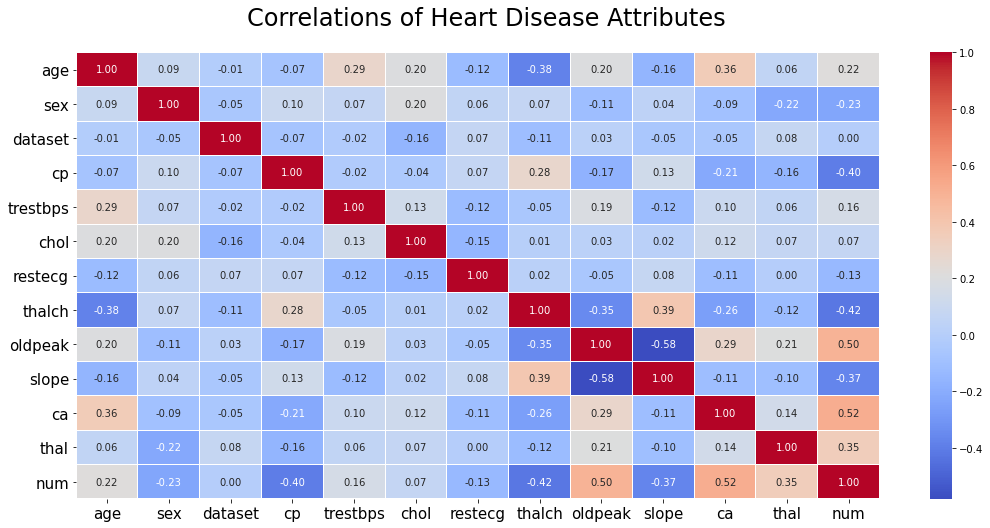

In [12]:
fig, ax = plt.subplots(figsize = (18,8))
hm = sns.heatmap(round(df_temp.drop("id", axis=1).corr(),2), annot = True, ax=ax, cmap = "coolwarm", fmt = '.2f', linewidth = 0.05)
fig.subplots_adjust(top = .9)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
t = fig.suptitle("Correlations of Heart Disease Attributes                    ", fontsize=24)

All three of slope, ca, and thal have a fairly high correlations with Num and a few high correlations with other features. However, none are high enough to trust that other features would explain the variance of slope, ca, or thal. Therefore, it is in our best interests to keep all three variables and replace NaN values with the mean for numerical variables and the mode for categorical variables.

In [13]:
#fillna by mean or mode
col_modes = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'dataset']].mode().iloc[0]
col_means = df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']].mean()

df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal','dataset']] = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal','dataset']].fillna(col_modes)
df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']] = df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']].fillna(col_means)

df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [14]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# Data Transformation

We apply some of the work we did above to the dataset to make our categorical variables into numerical values, to create dummy variables for our categorical variables in a separate dataset, and to set our target variable to a simple two levels of classes instead of five. In the new column, num_boolean, a 0 means  heart disease is not present, while a 1 means the patient instance has the disease in one of the 4 Stages.


In [15]:
#Preserve dataset categoricals
dforig = df.copy()
dforig['num_boolean'] = dforig['num'].map({0: 0,1: 1, 2: 1, 3: 1, 4: 1})
Xorig = dforig.drop(['id', 'num', 'num_boolean'], axis=1)
yorig = dforig.num
yborig = dforig.num_boolean

#Convert categoricals features to dummy variables for logistic regression
categories = ["sex", "dataset", "cp", "fbs", "restecg", "exang", "slope", "thal" ]
X_dummy = pd.get_dummies(Xorig, columns = categories)
X_dummy

,age,trestbps,chol,thalch,oldpeak,ca,sex_Female,sex_Male,dataset_Cleveland,dataset_Hungary,...,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145.000000,233.0,150.000000,2.300000,0.000000,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0
1,67,160.000000,286.0,108.000000,1.500000,3.000000,0,1,1,0,...,0,0,0,1,0,1,0,0,1,0
2,67,120.000000,229.0,129.000000,2.600000,2.000000,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
3,37,130.000000,250.0,187.000000,3.500000,0.000000,0,1,1,0,...,1,0,1,0,1,0,0,0,1,0
4,41,130.000000,204.0,172.000000,1.400000,0.000000,1,0,1,0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,127.000000,333.0,154.000000,0.000000,0.676375,1,0,0,0,...,0,1,1,0,0,1,0,0,1,0
916,62,132.132404,139.0,137.545665,0.878788,0.676375,0,1,0,0,...,0,1,1,0,0,1,0,0,1,0
917,55,122.000000,223.0,100.000000,0.000000,0.676375,0,1,0,0,...,0,1,1,0,0,1,0,1,0,0
918,58,132.132404,385.0,137.545665,0.878788,0.676375,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [16]:
df.cp.replace({"asymptomatic": 0, "atypical angina": 1, 'typical angina': 2, 'non-anginal': 3}, inplace=True)
df.sex.replace({"Male":0, "Female":1}, inplace=True)
df.restecg.replace({"lv hypertrophy": 0, "normal": 1, 'st-t abnormality': 2}, inplace=True)
df.slope.replace({"downsloping": 0, "flat": 1, 'upsloping': 2}, inplace=True)
df.thal.replace({"fixed defect": 0, "normal": 1, 'reversable defect': 2}, inplace=True)
df.dataset.replace({'Cleveland': 0,'Hungary': 1, 'Switzerland': 2,'VA Long Beach': 3}, inplace=True)
df['num_boolean'] = df['num'].map({0: 0,1: 1, 2: 1, 3: 1, 4: 1})

In [17]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,num_boolean
0,1,63,0,0,2,145.0,233.0,True,0,150.0,False,2.3,0,0.0,0,0,0
1,2,67,0,0,0,160.0,286.0,False,0,108.0,True,1.5,1,3.0,1,2,1
2,3,67,0,0,0,120.0,229.0,False,0,129.0,True,2.6,1,2.0,2,1,1
3,4,37,0,0,3,130.0,250.0,False,1,187.0,False,3.5,0,0.0,1,0,0
4,5,41,1,0,1,130.0,204.0,False,0,172.0,False,1.4,2,0.0,1,0,0


We now have all of our NaN values filled, and have converted the Categorial values in the original dataframe to numerical.

# Create Train-Validation-Test Split and Standardization

In [18]:
X = df.drop(['id', 'num', 'num_boolean'], axis=1) #Dataframe of features
y = df.num #Dataframe of target variable
yb = df.num_boolean #Dataframe of boolean target variable


In [19]:
X

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,0,0,2,145.000000,233.0,True,0,150.000000,False,2.300000,0,0.000000,0
1,67,0,0,0,160.000000,286.0,False,0,108.000000,True,1.500000,1,3.000000,1
2,67,0,0,0,120.000000,229.0,False,0,129.000000,True,2.600000,1,2.000000,2
3,37,0,0,3,130.000000,250.0,False,1,187.000000,False,3.500000,0,0.000000,1
4,41,1,0,1,130.000000,204.0,False,0,172.000000,False,1.400000,2,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,1,3,0,127.000000,333.0,True,2,154.000000,False,0.000000,1,0.676375,1
916,62,0,3,2,132.132404,139.0,False,2,137.545665,False,0.878788,1,0.676375,1
917,55,0,3,0,122.000000,223.0,True,2,100.000000,False,0.000000,1,0.676375,0
918,58,0,3,0,132.132404,385.0,True,0,137.545665,False,0.878788,1,0.676375,1


In [20]:
y

0      0
1      2
2      1
3      0
4      0
      ..
915    1
916    0
917    2
918    0
919    1
Name: num, Length: 920, dtype: int64

In [21]:
yb

0      0
1      1
2      1
3      0
4      0
      ..
915    1
916    0
917    1
918    0
919    1
Name: num_boolean, Length: 920, dtype: int64

In [22]:
#Training, validation and test sets for data with categoricals converted to numeric
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=111)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=111)

#Training, validation and test sets for data with categoricals converted to numeric, target variable is boolean
Xb_train, Xb_test, yb_train, yb_test = train_test_split(X, yb, test_size=0.10, random_state=222)
Xb_train, Xb_val, yb_train, yb_val = train_test_split(Xb_train, yb_train, test_size=0.30, random_state=222)

#Training, validation and test sets for data with categoricals converted to dummy variables maintaining their label names
Xdum_train, Xdum_test, ydum_train, ydum_test = train_test_split(X_dummy, y, test_size=0.10, random_state=333)
Xdum_train, Xdum_val, ydum_train, ydum_val = train_test_split(Xdum_train, ydum_train, test_size=0.30, random_state=333)

#Training, validation and test sets for data with categoricals converted to dummy variables maintaining their label names, target variable is boolean
Xbdum_train, Xbdum_test, ybdum_train, ybdum_test = train_test_split(X_dummy, yb, test_size=0.10, random_state=333)
Xbdum_train, Xbdum_val, ybdum_train, ybdum_val = train_test_split(Xbdum_train, ybdum_train, test_size=0.30, random_state=333)

In [23]:
#Standardize data
ss = preprocessing.StandardScaler()
ss.fit_transform(X_train)
X_train_ss = ss.fit_transform(X_train)
X_val_ss = ss.transform(X_val)
X_test_ss = ss.transform(X_test)

Xb_train_ss = ss.fit_transform(Xb_train)
Xb_val_ss = ss.transform(Xb_val)
Xb_test_ss = ss.transform(Xb_test)

Xdum_train_ss = ss.fit_transform(Xdum_train)
Xdum_val_ss = ss.transform(Xdum_val)
Xdum_test_ss = ss.transform(Xdum_test)

Xbdum_train_ss = ss.fit_transform(Xbdum_train)
Xbdum_val_ss = ss.transform(Xbdum_val)
Xbdum_test_ss = ss.transform(Xbdum_test)

# Exploratory Data Analysis

Now that we have our data in its Preprocessed and Cleaned format, we can take a look at it with Data Visualization. We want to learn more about our data and possibly see if any of the visualizations help us choose a model or choose how to make changes to the data or hyper parameters.

In [24]:
X.describe() #Summary statistics

,age,sex,dataset,cp,trestbps,chol,restecg,thalch,oldpeak,slope,ca,thal
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,0.210870,1.238043,0.954348,132.132404,199.130337,0.990217,137.545665,0.878788,1.152174,0.676375,1.158696
std,9.424685,0.408148,1.130673,1.214746,18.443895,108.957634,0.631863,25.138494,1.053774,0.516007,0.541667,0.483493
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,0.000000,120.000000,177.750000,1.000000,120.000000,0.000000,1.000000,0.676375,1.000000
50%,54.000000,0.000000,1.000000,0.000000,130.000000,221.000000,1.000000,138.000000,0.800000,1.000000,0.676375,1.000000
75%,60.000000,0.000000,2.000000,2.000000,140.000000,267.000000,1.000000,156.000000,1.500000,1.000000,0.676375,1.000000
max,77.000000,1.000000,3.000000,3.000000,200.000000,603.000000,2.000000,202.000000,6.200000,2.000000,3.000000,2.000000


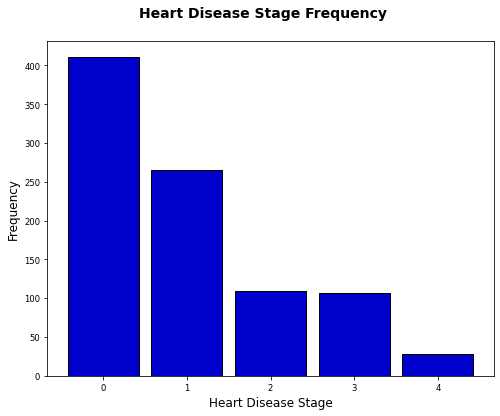

In [25]:
#Distribution of target variable, stages of disease
y_count = y.value_counts()
y_count = (list(y_count.index), list(y_count.values))

fig = plt.figure(figsize=(8, 6))
title = fig.suptitle("Heart Disease Stage Frequency", fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.9, wspace=0.3)

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Heart Disease Stage", fontsize = 12)
ax.set_ylabel("Frequency", fontsize = 12) 
ax.tick_params(axis='both', which='major', labelsize=8.5)

bar = ax.bar(y_count[0], 
             y_count[1], 
             width=0.85,
             color='mediumblue', 
             edgecolor='black', linewidth=1)

The data has a large distribution of patients without the disease, close to 45% of the dataset. Given this distribution, while we plan to model the individual Stages, we found it useful to create an additional target variable by converting all Stage 1-4 data to a Positive boolean value while absence of the disease is a Negative boolean value.

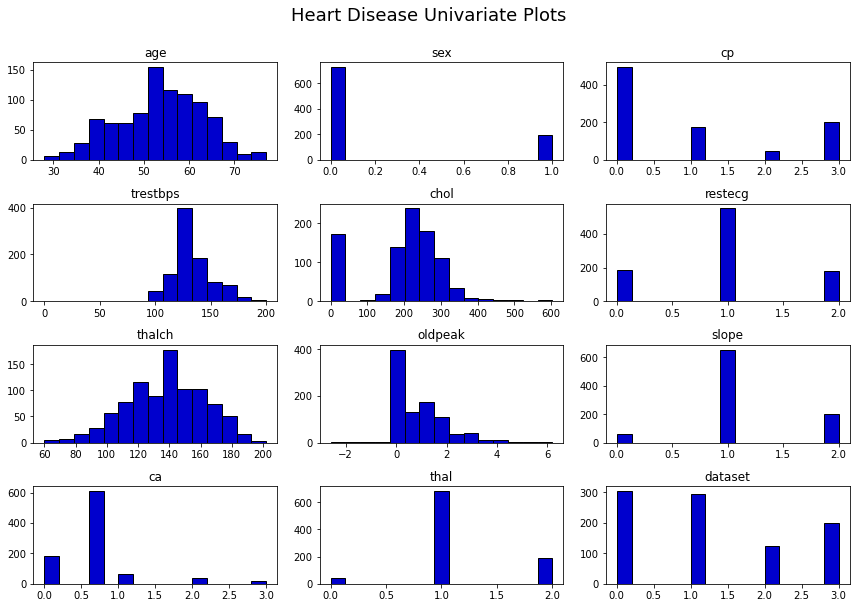

In [26]:
# Distributions of feature variables
X[['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalch', 'oldpeak', 'slope', 'ca', 'thal', 'dataset']].hist(bins=15, color='mediumblue', edgecolor='black', linewidth=1.0, xlabelsize=10, ylabelsize=10, grid=False)    
plt.tight_layout(rect=(0, 0, 2, 2))   
rt = plt.suptitle('Heart Disease Univariate Plots', x=1.0, y=2.1, fontsize=18) 

There are a few interesting findings from this visualization that could be useful to explore later, such as the larger ratio of Male to Female. Are there certain factors that we can find in this data that Men are more likely to have that lead to Heart Disease?

Other interesting distributions are the distributions of thal, slope, and ca that all largely have one bar in the histogram that is far larger than the rest. We will find in classification modeling that little importance is assigned to the slope feature, some to thal, and some to ca at least with Random Forest models.

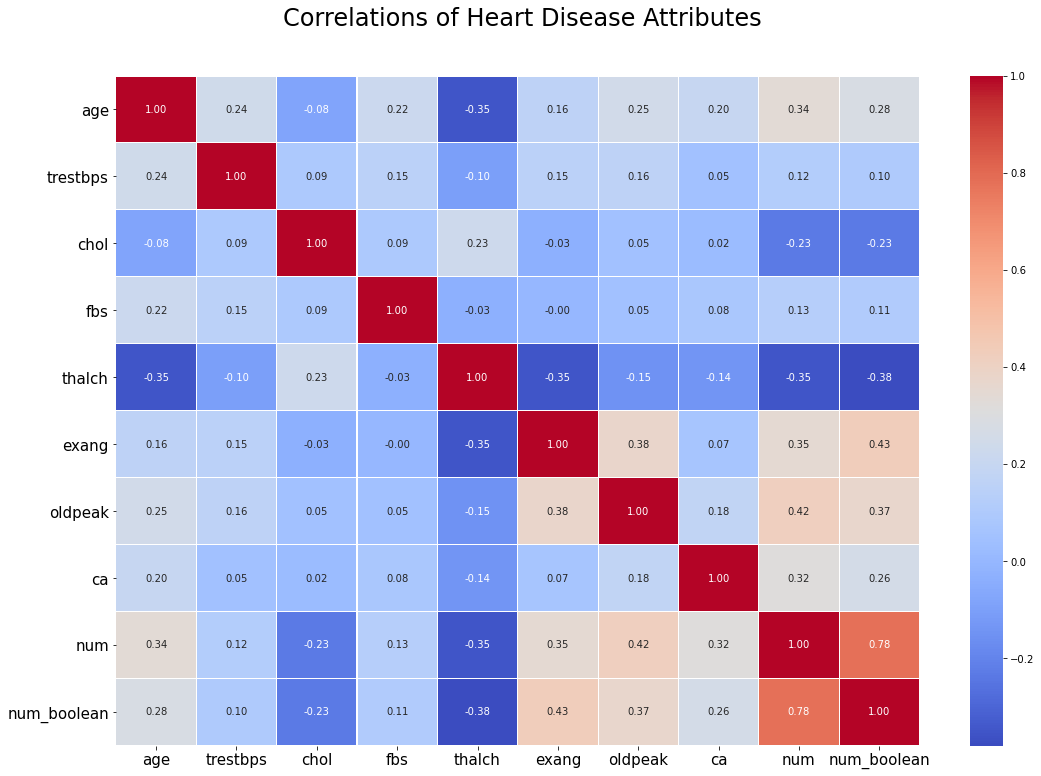

In [27]:
#Correlation matrix of numeric features and the target variables
fig, ax = plt.subplots(figsize = (18,12))
hm = sns.heatmap(round(dforig.drop("id", axis=1).corr(),2), annot = True, ax=ax, cmap = "coolwarm", fmt = '.2f', linewidth = 0.05)
fig.subplots_adjust(top = .9)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
plt.yticks(rotation=0)
t = fig.suptitle("Correlations of Heart Disease Attributes                     ", fontsize=24)

One research question we wanted to answer was: Is there a Correlation between Cholesterol ("chol") and Resting Blood Pressure at admission ("trestbp")? The correlation plot above can be used to determine that chol and trestbps are not correlated as they have a correlation value of 0.09.


Additionally, the correlation heat map gives us some strong correlation values between variables that could be interesting to visualize or explore further. Some such correlations are between exang and num, age and num, age and thalch, exang and thalch, exang and oldpeak, num and ca, and num and oldpeak.

All of these point toward correlations that we can explore in our modeling, and in visualizations in this project and the future.

Below is the Spearman Rank Correlation matrix for more appropriate treatment of categorical variables.

In [28]:
#Calculate correlations
cats = ["sex", "dataset", "cp", "fbs", "restecg", "exang", "slope", "thal", "chol", "trestbps"]

matrix = []
for cat1 in cats:
  row = []
  for cat2 in cats:
    corr = stats.spearmanr(dforig[cat1], dforig[cat2])
    row.append(corr.correlation)
  matrix.append(row)

corr = pd.DataFrame(matrix, index=cats, columns=cats)

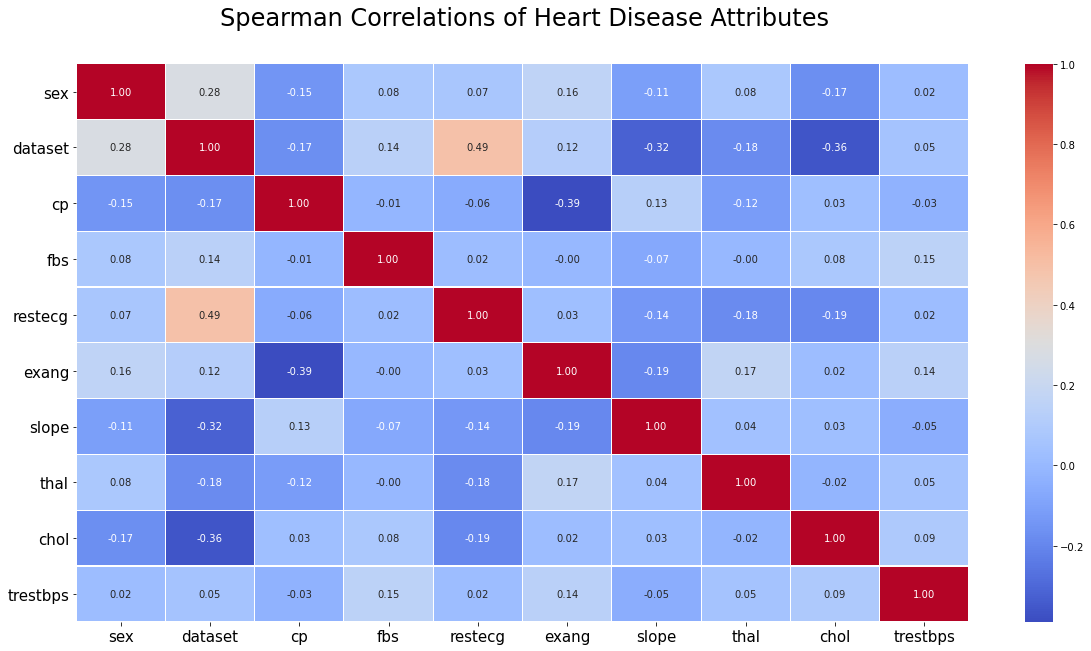

In [29]:
#Plot correlations
fig, ax = plt.subplots(figsize = (20,10))
hm = sns.heatmap(round(corr,2), annot = True, ax=ax, cmap = "coolwarm", fmt = '.2f', linewidth = 0.05)
fig.subplots_adjust(top = .9)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
plt.yticks(rotation=0)
t = fig.suptitle("Spearman Correlations of Heart Disease Attributes                        ", fontsize=24)

The Spearman Correlations bring us an interesting point, the highest Correlation on the plot is between dataset and restecg. In future evaluation, it could be useful to look at other medical variables not in this dataset that vary or have different distributions due to the location of treatment.


**Exploration of the Relationship Between Chest Pain Type and Heart Disease**

In [30]:
crosstab = pd.crosstab(df['cp'], df['num_boolean'])
crosstab

num_boolean,0,1
cp,,
0,104,392
1,150,24
2,26,20
3,131,73


In [31]:
stats.chi2_contingency(crosstab)

(268.3457473383063,
 7.03652487781721e-58,
 3,
 array([[221.5826087 , 274.4173913 ],
        [ 77.7326087 ,  96.2673913 ],
        [ 20.55      ,  25.45      ],
        [ 91.13478261, 112.86521739]]))

The first value (268.345) is the Chi-square value, followed by the p-value (7.036e-58), then the degrees of freedom (3), and lastly the expected frequencies as an array. Since all of the expected frequencies are greater than 5, the Chi-squared test results can be trusted. We can reject the null hypothesis as the p-value is less than 0.05. Thus, the results indicate that there is a relationship between chest pain ("cp") and heart disease.  Further into our analysis, we will find that there is a very strong relationship between chest pain type and heart disease with chest pain being the most important feature in our modeling.

**Relationship of Heart Disease to Feature Variables**

Text(0, 0.5, 'Location of Treatment (dataset)')

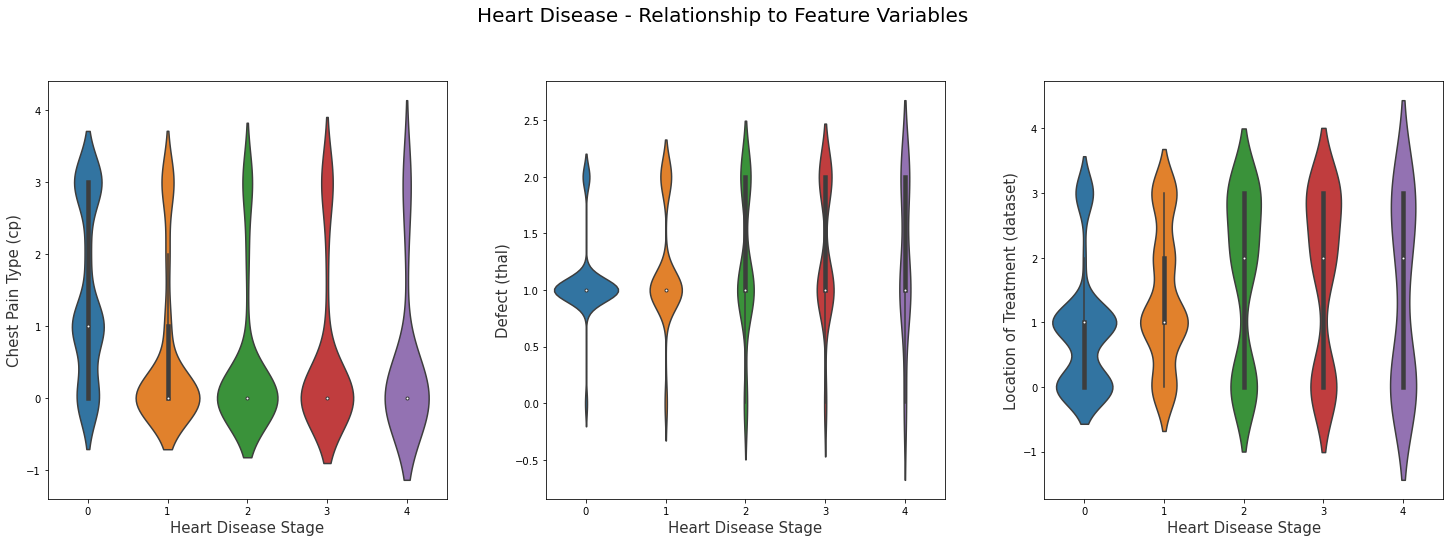

In [32]:
#Violin plots of distributions of feature variables by heart disease level
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,8))
f.suptitle('Heart Disease - Relationship to Feature Variables', fontsize=20)
f.subplots_adjust(top=0.85, wspace=0.25)

sns.violinplot(x="num", y="cp", data=df, ax=ax1)
ax1.set_xlabel("Heart Disease Stage",size = 15,alpha=0.8)
ax1.set_ylabel("Chest Pain Type (cp)",size = 15,alpha=0.8)

sns.violinplot(x="num", y="thal", data=df, ax=ax2)
ax2.set_xlabel("Heart Disease Stage",size = 15,alpha=0.8)
ax2.set_ylabel("Defect (thal)",size = 15,alpha=0.8)

sns.violinplot(x="num", y="dataset", data=df, ax=ax3)
ax3.set_xlabel("Heart Disease Stage",size = 15,alpha=0.8)
ax3.set_ylabel("Location of Treatment (dataset)",size = 15,alpha=0.8)

Text(0, 0.5, 'Slope of Peak Exercise (slope)')

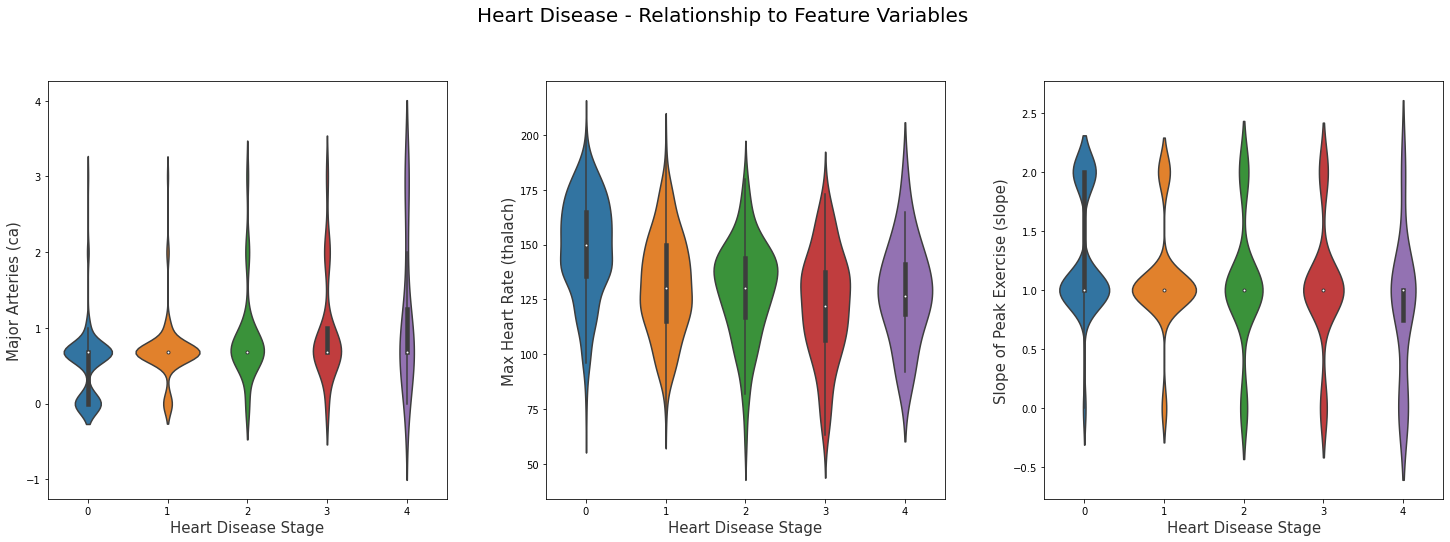

In [33]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,8))
f.suptitle('Heart Disease - Relationship to Feature Variables', fontsize=20)
f.subplots_adjust(top=0.85, wspace=0.25)

sns.violinplot(x="num", y="ca", data=df, ax=ax1)
ax1.set_xlabel("Heart Disease Stage",size = 15,alpha=0.8)
ax1.set_ylabel("Major Arteries (ca)",size = 15,alpha=0.8)

sns.violinplot(x="num", y="thalch", data=df, ax=ax2)
ax2.set_xlabel("Heart Disease Stage",size = 15,alpha=0.8)
ax2.set_ylabel("Max Heart Rate (thalach)",size = 15,alpha=0.8)

sns.violinplot(x="num", y="slope", data=df, ax=ax3)
ax3.set_xlabel("Heart Disease Stage",size = 15,alpha=0.8)
ax3.set_ylabel("Slope of Peak Exercise (slope)",size = 15,alpha=0.8)

Text(0, 0.5, 'ST Depression Induced by Exercise (oldpeak)')

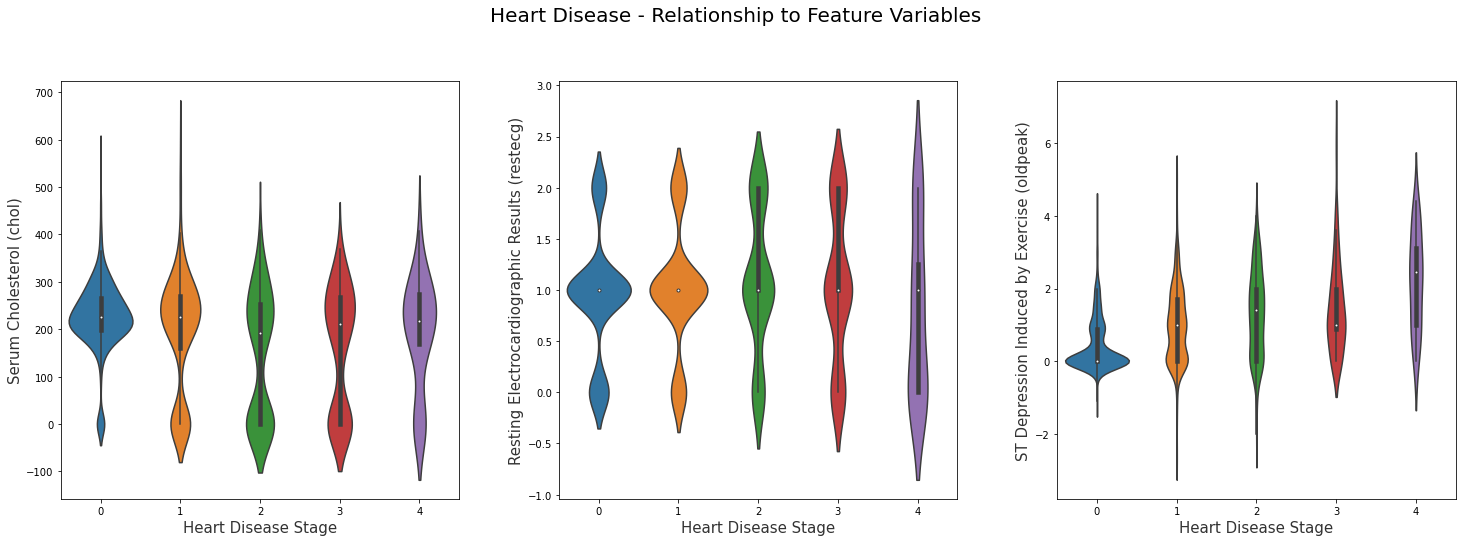

In [34]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,8))
f.suptitle('Heart Disease - Relationship to Feature Variables', fontsize=20)
f.subplots_adjust(top=0.85, wspace=0.25)

sns.violinplot(x="num", y="chol", data=df, ax=ax1)
ax1.set_xlabel("Heart Disease Stage",size = 15,alpha=0.8)
ax1.set_ylabel("Serum Cholesterol (chol)",size = 15,alpha=0.8)

sns.violinplot(x="num", y="restecg", data=df, ax=ax2)
ax2.set_xlabel("Heart Disease Stage",size = 15,alpha=0.8)
ax2.set_ylabel("Resting Electrocardiographic Results (restecg)",size = 15,alpha=0.8)

sns.violinplot(x="num", y="oldpeak", data=df, ax=ax3)
ax3.set_xlabel("Heart Disease Stage",size = 15,alpha=0.8)
ax3.set_ylabel("ST Depression Induced by Exercise (oldpeak)",size = 15,alpha=0.8)

The Data Visualization and Exploration above gives us more insight into features that are more closely tied to the target variable, and which of the 5 stages it is more informative about. Additionally, the correlation map and the violin plots give us more information about how correlated certain variables are to the target variable, and the violin plots focus on the different values of the target variable as well.

Some interesting relationships are those between heart disease stage and variables such as: cp, dataset, oldpeak, and ca. For example, chest pain values of 1 or 2 are far more likely to not have the disease. Chest pain distributions for patients without heart disease behave differently than Stages 1-4.  The distribution widens at higher stages.  Widening can be seen for most other variables as well.

Additionally, some of the datasets had far different distributions of heart disease stages in patients than others. 

/Users/eric/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/eric/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


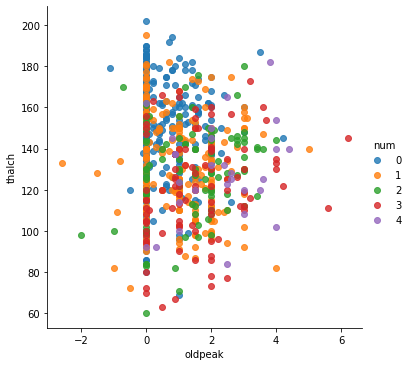

In [35]:

sns.lmplot('oldpeak', 'thalch', data=df, fit_reg= False, aspect=1, size =5, hue='num')

In the above graph, we can appreciate how the majority of the healthy population have higher thalch (blue color points) and lower oldpeak values than the population with heart disease. Though there is a lot of overlap on the scatter plot between the various heart disease stages, each value seems to also have a more defined area of the scatterplot that it centers on. This highlights a correlation between thalch, oldpeak, and num.

Text(0.5, 1.0, 'Frequency of ST Depression Induced by Exercise')

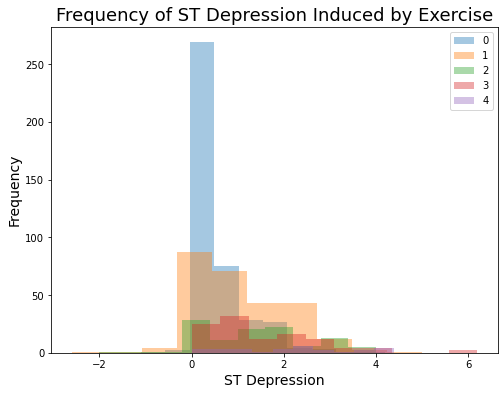

In [36]:
df.groupby('num')['oldpeak'].plot(kind='hist', alpha=0.4,legend=True, figsize=(8, 6))
plt.xlabel('ST Depression', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.title('Frequency of ST Depression Induced by Exercise', fontsize=18)

Next, we will be looking at the difference in heart disease features based on sex. As stated earier, we know that there are more men in the dataset than women. 

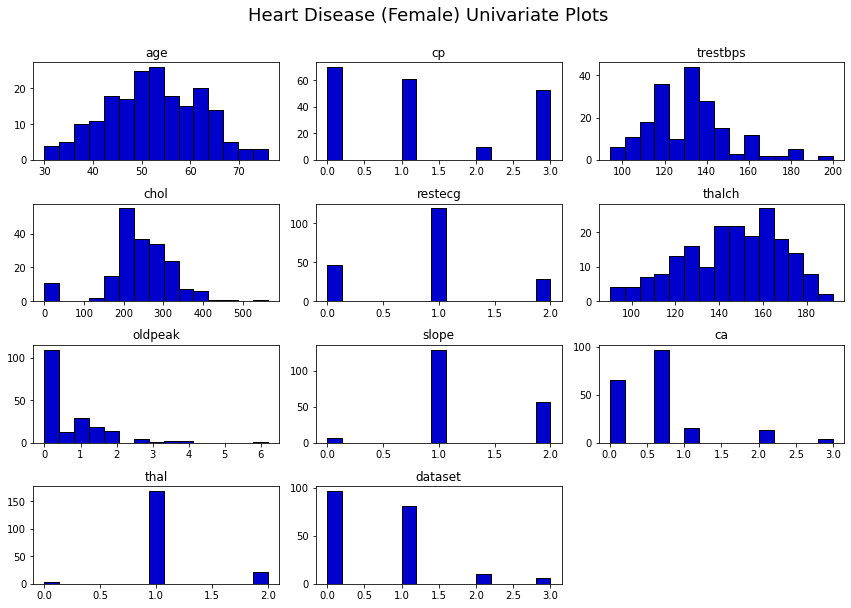

In [37]:
female = X[X['sex'] == 1]
female[['age', 'cp' ,'trestbps', 'chol', 'restecg', 'thalch', 'oldpeak', 'slope', 'ca', 'thal', 'dataset']].hist(bins=15, color='mediumblue', edgecolor='black', linewidth=1.0, xlabelsize=10, ylabelsize=10, grid=False)    
plt.tight_layout(rect=(0, 0, 2, 2))   
rt = plt.suptitle('Heart Disease (Female) Univariate Plots', x=1, y=2.1, fontsize=18) 

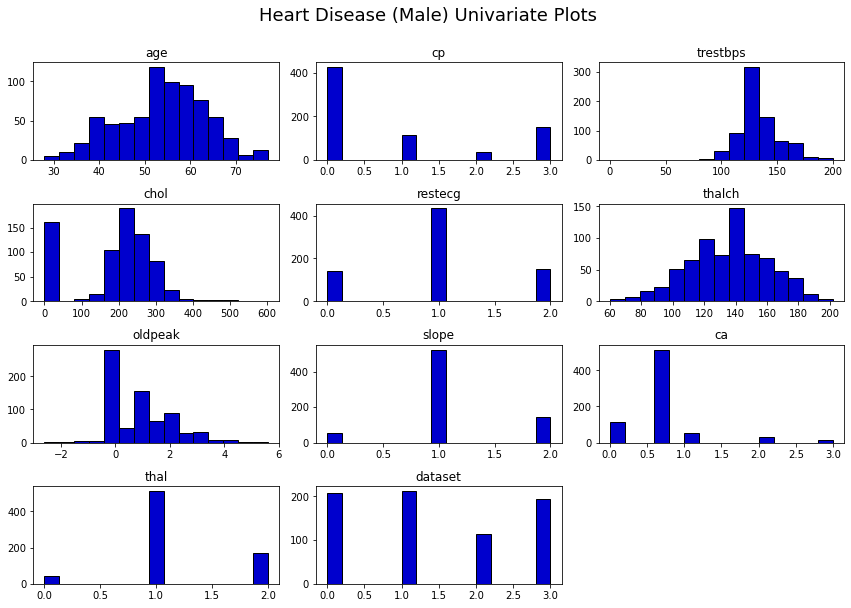

In [38]:
male = X[X['sex'] == 0]
male[['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalch', 'oldpeak', 'slope', 'ca', 'thal', 'dataset']].hist(bins=15, color='mediumblue', edgecolor='black', linewidth=1.0, xlabelsize=10, ylabelsize=10, grid=False)    
#female[['age', 'cp' ,'trestbps', 'chol', 'restecg', 'thalch', 'oldpeak', 'slope', 'ca', 'thal', 'dataset']].hist(bins=15, color='mediumblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 2, 2))   
rt = plt.suptitle('Heart Disease (Male) Univariate Plots', x=1, y=2.1, fontsize=18) 

Some noticeable differences here are that, 
the age distribution for men tends to be skewed towards the later years while women tends to be more evenly spread out.
There are few male patients with have atypical angina (cp = 1).
The distribution of trestsbps seems to be skewed more to the right for men and it is more evenly distributed in women. 
It also seems that there is a higher percentage of men with lower cholesteral levels.

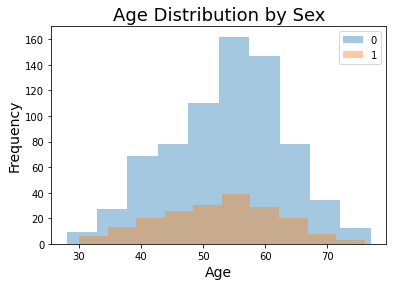

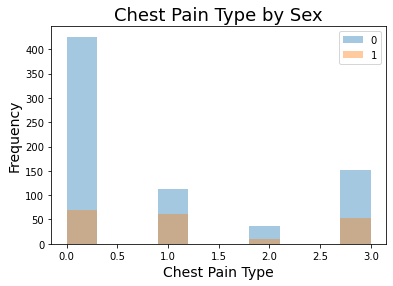

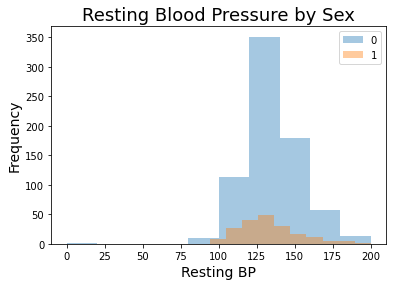

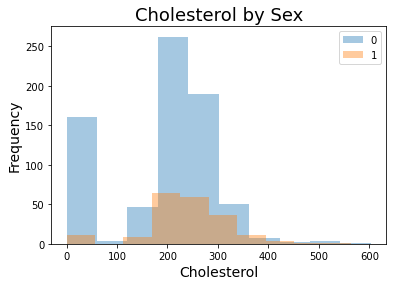

In [39]:
df.groupby('sex')['age'].plot(kind='hist', alpha=0.4,legend=True)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.title('Age Distribution by Sex', fontsize = 18)
plt.show()

df.groupby('sex')['cp'].plot(kind='hist', alpha=0.4,legend=True)
plt.xlabel('Chest Pain Type', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.title('Chest Pain Type by Sex', fontsize = 18)
plt.show()
df.groupby('sex')['trestbps'].plot(kind='hist', alpha=0.4,legend=True)
plt.xlabel('Resting BP', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.title('Resting Blood Pressure by Sex', fontsize = 18)
plt.show()
df.groupby('sex')['chol'].plot(kind='hist', alpha=0.4,legend=True)
plt.xlabel('Cholesterol', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.title('Cholesterol by Sex', fontsize = 18)
plt.show()

Next, we will be examing the relationship between the boolean value 'exang' which represents if a person has exercise induced angina and 'thalch' which represents the maxium hearthrate achieved.

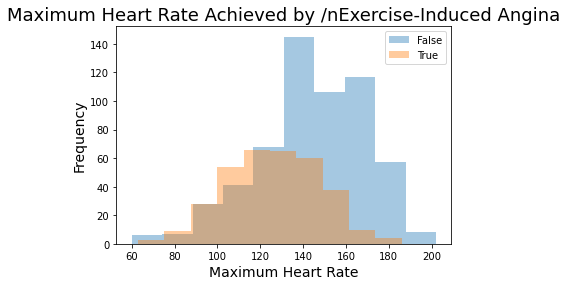

In [40]:
df.groupby('exang')['thalch'].plot(kind='hist', alpha=0.4,legend=True)
plt.xlabel('Maximum Heart Rate', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.title('Maximum Heart Rate Achieved by /nExercise-Induced Angina', fontsize = 18)
plt.show()

As we can see from the graph the distribution of the maximum heart rate achieved ("thalch") skews lower if someone does have exercise-induced angina. For those who don't have exercise-induced angina, most maximum heart rates are between 140 to 180. For those who do the max heartrate range is mostly between 100 to 140 bpm. This makes sense due to the fact that this makes exercising difficult and could affect heart rate.

As we can further see from box plots below on trestbps, chol and oldpeak, all these variables have outliers to the data. We chose not to remove these outliers in this report as we lack medical knowledge and there are already enough null values.

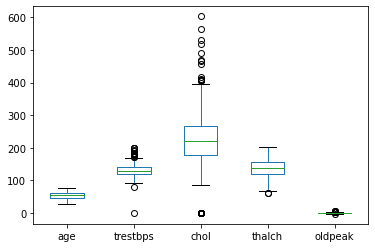

In [41]:
# Checking outliers

df_outliers = df[['age','trestbps','chol','thalch','oldpeak']]
df_outliers.plot(kind='box')
plt.show()

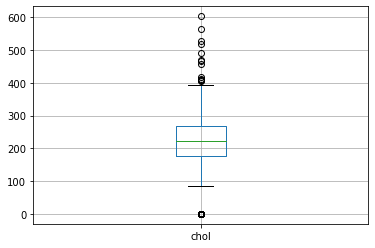

In [42]:
boxplot = df.boxplot(column=['chol'])

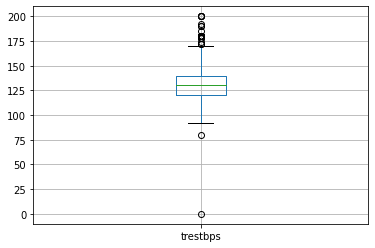

In [43]:
boxplot = df.boxplot(column=['trestbps'])

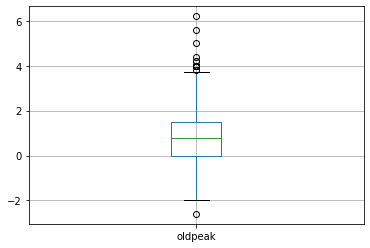

In [44]:
boxplot = df.boxplot(column=['oldpeak'])

## PCA

We are running PCA and KPCA on the data because the size of the dataset is small so the less features, the better. Additionally, as these are all medical features that are thought or known to be related to Heart Disease, it may be possible to use fewer components to represent the data.

In [45]:
ss = preprocessing.StandardScaler()
ss.fit_transform(X)
X_ss = ss.fit_transform(X)

ss.fit_transform(X_dummy)
X_dum_ss = ss.fit_transform(X_dummy)

In [46]:
pca = PCA()
pca.fit(X_ss)

PCA()

[0.19611365 0.32412718 0.41667047 0.49772534 0.56681474 0.63402102
 0.69675613 0.75300158 0.80695365 0.85819178 0.90333135 0.9441598
 0.97476233 1.        ]


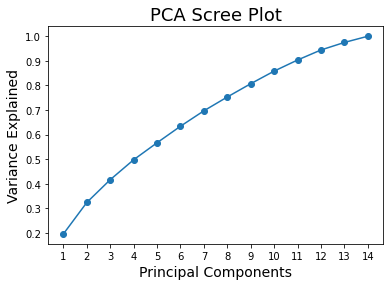

In [47]:
print(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_.cumsum(), '-o');
plt.title('PCA Scree Plot', fontsize = 18)
plt.xticks(ticks= range(X_ss.shape[1]), labels=[i+1 for i in range(X_ss.shape[1])])
plt.xlabel('Principal Components', fontsize = 14)
plt.ylabel('Variance Explained', fontsize = 14)
plt.show()

From the above graph, we can infere that, for this particular dataset, there are many components needed to capture 90% of the data. We would still need approximately 11 components, so PCA may not be valuable to classification.

In [48]:
pca = PCA(n_components=11)
pca.fit(X_ss)

PCA(n_components=11)

In [49]:
X_pca = pca.transform(X_ss)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.10, random_state=111)
X_train_pca, X_val_pca, y_train_pca, y_val_pca = train_test_split(X_train_pca, y_train_pca, test_size=0.30, random_state=111)

Xb_train_pca, Xb_test_pca, yb_train_pca, yb_test_pca = train_test_split(X_pca, yb, test_size=0.10, random_state=111)
Xb_train_pca, Xb_val_pca, yb_train_pca, yb_val_pca = train_test_split(Xb_train_pca, yb_train_pca, test_size=0.30, random_state=111)

In [50]:
pca.fit(X_dum_ss)
X_dum_pca = pca.transform(X_dum_ss)

X_dum_train_pca, X_dum_test_pca, y_dum_train_pca, y_dum_test_pca = train_test_split(X_dum_pca, y, test_size=0.10, random_state=111)
X_dum_train_pca, X_dum_val_pca, y_dum_train_pca, y_dum_val_pca = train_test_split(X_dum_train_pca, y_dum_train_pca, test_size=0.30, random_state=111)

Xb_dum_train_pca, Xb_dum_test_pca, yb_dum_train_pca, yb_dum_test_pca = train_test_split(X_dum_pca, yb, test_size=0.10, random_state=111)
Xb_dum_train_pca, Xb_dum_val_pca, yb_dum_train_pca, yb_dum_val_pca = train_test_split(Xb_dum_train_pca, yb_dum_train_pca, test_size=0.30, random_state=111)

## KPCA


KPCA was run  Gaussian kernel.  Polynomial kernel was also tested.  Both sets of components were tested in multiple classification models.  Classification results were similar for Gaussian and polynomial with Gaussian improving some of the poorer performing classification models.  The Gaussian KPCA modeling is shown below.

In [51]:
kpca = KernelPCA(n_components=100, kernel='rbf', n_jobs=-1, remove_zero_eig=True, random_state=1)
kpca.fit(X_ss)

KernelPCA(kernel='rbf', n_components=100, n_jobs=-1, random_state=1,
          remove_zero_eig=True)

[0.10556266 0.1785981  0.23672799 0.28600246 0.33055547 0.36750953
 0.40362416 0.43831447 0.46735228 0.49363362 0.51870995 0.54239932
 0.56171536 0.58037848 0.59711484 0.61180646 0.62431215 0.63662409
 0.64819165 0.65899206 0.66913441 0.6787543  0.68828213 0.69687381
 0.70536901 0.71357856 0.72162925 0.72897956 0.73620784 0.74321751
 0.750156   0.75697419 0.76347314 0.76970603 0.77563633 0.78146534
 0.78716482 0.79273086 0.79819454 0.80357387 0.80881472 0.81398463
 0.81893616 0.82380154 0.82861379 0.8332938  0.83794113 0.8424838
 0.84692074 0.85122889 0.85549696 0.85970995 0.86379952 0.86783673
 0.87183689 0.87580223 0.87967093 0.88346633 0.88718744 0.89081857
 0.89442608 0.89794936 0.90144909 0.90491177 0.90826882 0.91159846
 0.91488089 0.91808772 0.92124933 0.92436519 0.92744133 0.9304919
 0.93352205 0.93647849 0.93937462 0.94224403 0.94501206 0.9477664
 0.95049906 0.95321143 0.95587353 0.95850911 0.96109793 0.96366691
 0.96617227 0.96867484 0.97111084 0.97352973 0.97592631 0.9782979

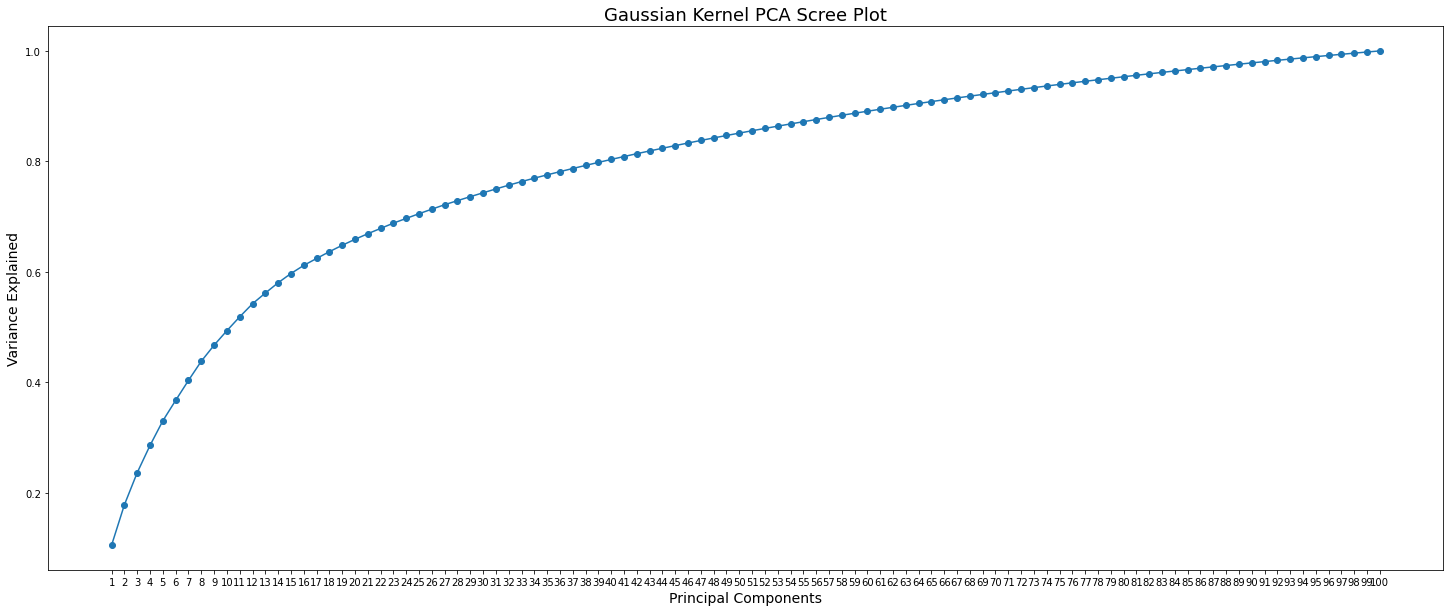

In [52]:
print(kpca.lambdas_.cumsum()/kpca.lambdas_.sum())
plt.figure(figsize = (25,10))
plt.plot(kpca.lambdas_.cumsum()/kpca.lambdas_.sum(), '-o');
plt.title("Gaussian Kernel PCA Scree Plot",fontsize = 18)
plt.xticks(ticks = range(100), labels = [i+1 for i in range(100)])
plt.xlabel('Principal Components', fontsize = 14)
plt.ylabel('Variance Explained', fontsize = 14)
plt.show()

Targeting 90% of the variance explained, select 75 components.

In [53]:
kpca = KernelPCA(n_components=75, kernel='rbf', n_jobs=-1, remove_zero_eig=True, random_state=0)
kpca.fit(X_ss)

KernelPCA(kernel='rbf', n_components=75, n_jobs=-1, random_state=0,
          remove_zero_eig=True)

In [54]:
X_kpca = kpca.transform(X_ss)

X_train_kpca, X_test_kpca, y_train_kpca, y_test_kpca = train_test_split(X_kpca, y, test_size=0.10, random_state=111)
X_train_kpca, X_val_kpca, y_train_kpca, y_val_kpca = train_test_split(X_train_kpca, y_train_kpca, test_size=0.30, random_state=111)

Xb_train_kpca, Xb_test_kpca, yb_train_kpca, yb_test_kpca = train_test_split(X_kpca, yb, test_size=0.10, random_state=111)
Xb_train_kpca, Xb_val_kpca, yb_train_kpca, yb_val_kpca = train_test_split(Xb_train_kpca, yb_train_kpca, test_size=0.30, random_state=111)

In [55]:
kpca = KernelPCA(n_components=11, kernel='rbf', n_jobs=-1, remove_zero_eig=True, random_state=0)
kpca.fit(X_dum_ss)

KernelPCA(kernel='rbf', n_components=11, n_jobs=-1, random_state=0,
          remove_zero_eig=True)

In [56]:
X_dum_kpca = kpca.transform(X_dum_ss)

X_dum_train_kpca, X_dum_test_kpca, y_dum_train_kpca, y_dum_test_kpca = train_test_split(X_dum_kpca, y, test_size=0.10, random_state=111)
X_dum_train_kpca, X_dum_val_kpca, y_dum_train_kpca, y_dum_val_kpca = train_test_split(X_dum_train_kpca, y_dum_train_kpca, test_size=0.30, random_state=111)

Xb_dum_train_kpca, Xb_dum_test_kpca, yb_dum_train_kpca, yb_dum_test_kpca = train_test_split(X_dum_kpca, yb, test_size=0.10, random_state=111)
Xb_dum_train_kpca, Xb_dum_val_kpca, yb_dum_train_kpca, yb_dum_val_kpca = train_test_split(Xb_dum_train_kpca, yb_dum_train_kpca, test_size=0.30, random_state=111)

# **Research Questions**

Having explored the data, we have developed the following research goals.

**Research Question 1:**

**Main Project Objective:  Can heart disease and the stage of heart disease be predicted with reasonable accuracy with personal and medical patient data?**  This is main goal of the project.  Classification methodologies will be useful to model this, the target variable.

**Conclusion:**  Techniques attempted were K Nearest Neighbors, Logistic Regression, Naive Bayes, Decision Tree, Random Forest, and Support Vector Machine with and without (Kernel)PCA and with and without bagging or boosting.  We were able to predict with high accuracy, sensitivity and specificity whether a patient suffers from heart disease. Unfortunately, due to the unbalanced data, the need for a larger number of instances, and wider array of features, the model did not perform well in the prediction of the 4 stages. Because the main purpose for this model is to ensure early detection heart disease so as to treat a patient in time to avoid serious complications, Sensitivity was the key metric we relied upon to measure sound model performance.

Multiple machine learning classification techniques were attempted to predict heart disease.  Random Forest and Linear Support Vector Machine outperfomed other models.

**Research Question 2:**

**What are the key attributes relatable to heart disease and to what degree?**  This can be drawn from the  classification models in computing variable importance. Additionally, feature importance can be obtained from the p-values significance test from logistic regression modeling.  Below are results offrom logistic regression modeling.

In [57]:
#The syntax used to ansewered this question are :
X_copy = X.copy()
X_copy.fbs.replace({True:1, False:0}, inplace=True)
X_copy.exang.replace({True:1, False:0}, inplace=True)
lr = sm.Logit(yb,X_copy)
result = lr.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.418539
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            num_boolean   No. Observations:                  920
Model:                          Logit   Df Residuals:                      906
Method:                           MLE   Df Model:                           13
Date:                Sat, 12 Jun 2021   Pseudo R-squ.:                  0.3912
Time:                        21:54:06   Log-Likelihood:                -385.06
converged:                       True   LL-Null:                       -632.47
Covariance Type:            nonrobust   LLR p-value:                 1.842e-97
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0182      0.010      1.866      0.062      -0.001       0.037
sex           -1.1500      0.

**Conclusion:**  From the p-values in the fourth column, we can see which variables are significant in the prediction of heart disease. P-values less than 0.05 such as: sex, location of dataset collection, chest pain type (cp), cholesterol (chol), maximum heart rate (thalch), exercise-induced angina (exang), ST depression induced by exercise (oldpeak) , number of blood vessels colored by fluoroscopy (ca) are significant in Logistic Regression. Later on, we are going to comfirm and compare these variables importance with other machine learning techniques.  While Logistic Regression valued a number of features, Decision Tree and Random Forest classification were focused on a narrower set of variables.  The two models identified chest pain type as the most important variable.  Chest pain was by far the most important feature in Decision Tree classification.  The location of the dataset collection was found to be important which makes sense given the cultural and operational differences of hospitals and where they are physically located.  ST depression induced by exercise, and exercise-induced angina were important features in Random Forest modeling.  In the Machine Learning Decision Tree and Random Forest sections of this notebook, feature importance plots display the importance of all variables considered in modeling.



**Research Question 3**

**Is there a relationship between chest pain type and stage of a heart disease?** Cross correlation Chi-Square test will be performed.

**Conclusion:**  With the Chi-Square statistical test, we verified the p-value as well as the expected frequencies values.  The p-value (7.036e-58)  is less than 0.05, and the expected frequencies were greater than 5. Thus the p-value can be trusted. We reject the null hypothesis, and the result indicates that there is a relationship between chest pain and heart disease.

In [58]:
# Code used:
# crosstab = pd.crosstab(df['cp'], df['num_boolean'])
# stats.chi2_contingency(crosstab)

**Research Question 4**

**Is there a difference in cholesterol level in relation to whether or not a patient has heart disease?**

**Conclusion:**  Given that the Spearman correlation between cholesterol and heart disease is 0.13 and the p-value is less than 0.05, we confirmed that there is a possitive weak correlation between cholesterol and heart disease.

In [59]:
corr = stats.spearmanr(df['chol'], df['num_boolean'])
corr

SpearmanrResult(correlation=-0.12819348904777741, pvalue=9.654582096043186e-05)

**Research Question 5**

**Is there an association between cholesterol and resting blood pressure at admission?** Depending on the normality test on each variable, we can use a parametric test such as Pearson correlation or in the case of non-parametric Spearman Correlation.


**Conclusion:**The Spearman correlation between cholesterol and resting blood pressure was 0.09. As a rule of thumb, this correlation is negligible and we can say that cholesterol and resting blood pressure at admission are not correlated for the present dataset.   

In [60]:
# Code used:
corr = stats.spearmanr(df['chol'], df['trestbps'])
corr

SpearmanrResult(correlation=0.08931743907848373, pvalue=0.006710722255683012)

# Machine Learning Techniques

Our focus was on classification algorithms due to the categorical nature of the target variable.  We attempted most classification techniques to see if we could improve model outcomes.


We attempted modeling with the original five-level target.  Even with the inclusion of balancing hyper-parameter assumptions due to the high percentage of patients without heart disease, it became apparent that the generalizability of the models would not be possible in five-level detail.  Excluding patients without heart disease drastically reduced the size of the dataset and delivered poor model performance and are not included in this notebook.  As a result, most of the analysis below uses a boolean target variable (0 = absence of heart disease, 1 = presence of heart disease) although we do provide some modeling of the five-level target to demonstrate its poor results.


Depending on the model, standardized features were utilized.  PCA and Kernel PCA was employed and appeared to benefit some model outcomes.  To reduce variability and stabilize models, boosting and bagging were attempted and also proved beneficial.

Cross validation with the training set was used for hyper-parameter tuning.  Training, validation, and test sets were used elsewhere.  Test set represented 10% of the patient instances.  Training and validation were 90% of the instances in total and split 70-30.

Sensitivity was our key metric due to the importance of correctly predicting the presence of heart disease in patients over predicting the absence of heart disease.

Lastly, for those techniques that lacked the ability to set seed values, we did find that results varied by model run.  The model deemed as optimal may not have always been the optimal model depending on the model run.

# K Nearest Neighbors


We begin KNN with the original multi-Stage target variable and standardized features.

Our initial accuracy is very poor, so we try it on the boolean target variable dataset next.

In [61]:
b_neighbors = KNeighborsClassifier(n_neighbors = 15, weights = 'distance', p=2) #weights very mildly helps, p=2 manhattan distance mildly helps
b_neighbors.fit(Xb_train_ss, yb_train)

#Predictions and accuracy metric calculation of KNN
b_predNNTrain = b_neighbors.predict(Xb_train_ss)
b_accuracyNNTrain = metrics.balanced_accuracy_score(y_true = yb_train, y_pred = b_predNNTrain)
b_predNNVal = b_neighbors.predict(Xb_val_ss)
b_accuracyNNVal = metrics.balanced_accuracy_score(y_true = yb_val, y_pred = b_predNNVal)
b_RecallNNTrain = metrics.recall_score(y_true = yb_train, y_pred = b_predNNTrain)
b_RecallNNVal = metrics.recall_score(y_true = yb_val, y_pred = b_predNNVal)

print('Sensitivity scores for the training and validation sets are: ',round(b_RecallNNTrain,3), ' and ', round(b_RecallNNVal,3),' respectively.')

Sensitivity scores for the training and validation sets are:  1.0  and  0.787  respectively.


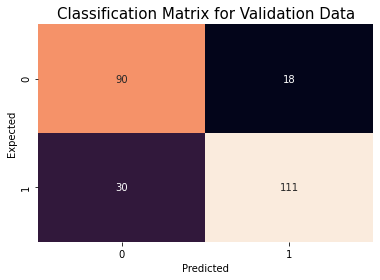

Training Sensitivity       1.0
Valuation Sensitivity      0.787 

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       108
           1       0.86      0.79      0.82       141

    accuracy                           0.81       249
   macro avg       0.81      0.81      0.81       249
weighted avg       0.81      0.81      0.81       249

Specificity:  0.75


In [62]:

modelOutput(yb_train, b_predNNTrain, yb_val, b_predNNVal)

Model performance is improved with a boolean target variable.

In [63]:
b_neighbors = KNeighborsClassifier(n_neighbors = 8, weights = 'distance', p=2) #weights very mildly helps, p=2 manhattan distance mildly helps
b_neighbors.fit(Xb_train_kpca, yb_train_kpca)

#Predictions and accuracy metric calculation of KNN
b_predNNTrain = b_neighbors.predict(Xb_train_kpca)
b_accuracyNNTrain = metrics.balanced_accuracy_score(y_true = yb_train_kpca, y_pred = b_predNNTrain)
b_predNNVal = b_neighbors.predict(Xb_val_kpca)
b_accuracyNNVal = metrics.balanced_accuracy_score(y_true = yb_val_kpca, y_pred = b_predNNVal)
b_RecallNNTrain = metrics.recall_score(y_true = yb_train_kpca, y_pred = b_predNNTrain)
b_RecallNNVal = metrics.recall_score(y_true = yb_val_kpca, y_pred = b_predNNVal)

print('Sensitivity scores for the training and validation sets are: ',round(b_RecallNNTrain,3), ' and ', round(b_RecallNNVal,3),' respectively.')

Sensitivity scores for the training and validation sets are:  1.0  and  0.889  respectively.


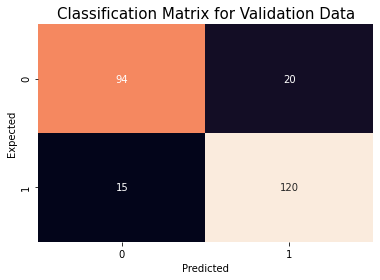

Training Sensitivity       1.0
Valuation Sensitivity      0.889 

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       114
           1       0.86      0.89      0.87       135

    accuracy                           0.86       249
   macro avg       0.86      0.86      0.86       249
weighted avg       0.86      0.86      0.86       249

Specificity:  0.862


In [64]:
modelOutput(yb_train_kpca, b_predNNTrain, yb_val_kpca, b_predNNVal)

KPCA appears to perform better than standardized features.

In [65]:
b_neighbors = KNeighborsClassifier(n_neighbors = 5, weights = 'distance', p=2) #weights very mildly helps, p=2 manhattan distance mildly helps
b_neighbors.fit(Xb_train_pca, yb_train_pca)

#Predictions and accuracy metric calculation of KNN
b_predNNTrain = b_neighbors.predict(Xb_train_pca)
b_accuracyNNTrain = metrics.balanced_accuracy_score(y_true = yb_train_pca, y_pred = b_predNNTrain)
b_predNNVal = b_neighbors.predict(Xb_val_pca)
b_accuracyNNVal = metrics.balanced_accuracy_score(y_true = yb_val_pca, y_pred = b_predNNVal)
b_RecallNNTrain = metrics.recall_score(y_true = yb_train_pca, y_pred = b_predNNTrain)
b_RecallNNVal = metrics.recall_score(y_true = yb_val_pca, y_pred = b_predNNVal)

print('Sensitivity scores for the training and validation sets are: ',round(b_RecallNNTrain,3), ' and ', round(b_RecallNNVal,3),' respectively.')

Sensitivity scores for the training and validation sets are:  1.0  and  0.867  respectively.


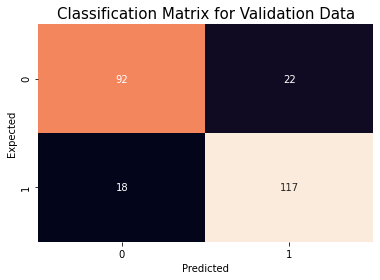

Training Sensitivity       1.0
Valuation Sensitivity      0.867 

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       114
           1       0.84      0.87      0.85       135

    accuracy                           0.84       249
   macro avg       0.84      0.84      0.84       249
weighted avg       0.84      0.84      0.84       249

Specificity:  0.836


In [66]:
modelOutput(yb_train_pca, b_predNNTrain, yb_val_pca, b_predNNVal)

Classification with KPCA components with 8 neighbors performs better than standardized features and PCA with their respective optimal number of neighbors.

Tuning of number of neighbors is the next step. We will use KPCA due to its better classification results.

In [67]:
#Hyper-parameter tuning
k_param = [3,4,5,6,7,8,9,10,12,14,16,18,20,25,30,40]
krecall_train = []
krecall_val = []
for k in k_param:
    kneighbor = KNeighborsClassifier(n_neighbors=k)
    kneighbor.fit(Xb_train_kpca, yb_train_kpca)
    #print('Iterations:', neighbor.n_iter_) #use to confirm that code is going through the iterations
    kpredNNTrain = kneighbor.predict(Xb_train_kpca)
    krecall_train.append(round(metrics.recall_score(y_true = yb_train_kpca, y_pred = kpredNNTrain),3))
    #print("c:", C, "accuracy:",accuracy_train) #check the storage of the accuracy metric
    kpredNNVal = kneighbor.predict(Xb_val_kpca)
    krecall_val.append(round(metrics.recall_score(y_true = yb_val_kpca, y_pred = kpredNNVal),3))
    
print("Training Sensitivity:   ", krecall_train)
print("Validation Sensitivity: ", krecall_val)

Training Sensitivity:    [0.889, 0.822, 0.871, 0.825, 0.871, 0.846, 0.874, 0.846, 0.84, 0.84, 0.849, 0.846, 0.849, 0.874, 0.855, 0.852]
Validation Sensitivity:  [0.881, 0.822, 0.852, 0.837, 0.881, 0.844, 0.867, 0.852, 0.852, 0.852, 0.859, 0.874, 0.867, 0.889, 0.889, 0.896]


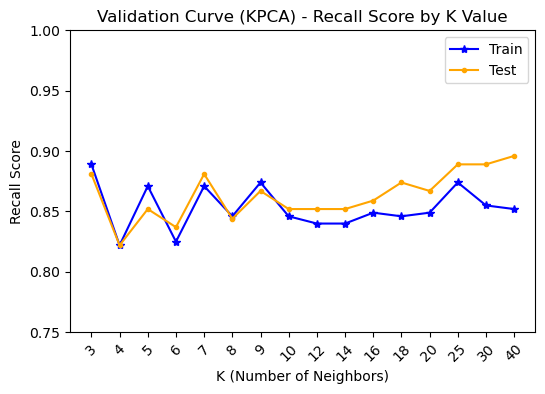

In [68]:
#Validation curve
f, ax = plt.subplots(dpi = 100) #Dont think really need this line
plt.plot(krecall_train, marker = '*', color = 'blue', label = 'Train')
plt.plot(krecall_val, marker = '.', color = 'orange', label = 'Test')
plt.xticks(np.arange(len(k_param)), k_param, rotation = 45)
plt.ylim([0.75, 1.0])
plt.xlabel('K (Number of Neighbors)')
plt.ylabel("Recall Score")
plt.legend(loc = 'upper right')
plt.title("Validation Curve (KPCA) - Recall Score by K Value", fontsize = 12)
plt.show()

Our best number of neighbors from our testing is 5, but classification results with 8 neighbors was better.  Below is the final selected model with 8 neighbors.

Training Sensitivity:    1.0
Valuation Sensitivity:   0.889
Test Sensitivity:        0.816 



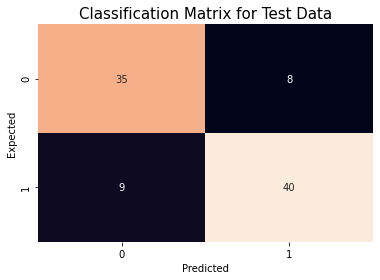

Test Results:               precision    recall  f1-score   support

           0       0.80      0.81      0.80        43
           1       0.83      0.82      0.82        49

    accuracy                           0.82        92
   macro avg       0.81      0.82      0.81        92
weighted avg       0.82      0.82      0.82        92

Specificity:  0.795


In [69]:
b_neighbors = KNeighborsClassifier(n_neighbors = 8, weights = 'distance', p=2) #weights very mildly helps, p=2 manhattan distance mildly helps
b_neighbors.fit(Xb_train_kpca, yb_train_kpca)

b_predNNTrain = b_neighbors.predict(Xb_train_kpca)
b_predNNVal = b_neighbors.predict(Xb_val_kpca)
b_predNNTest = b_neighbors.predict(Xb_test_kpca)

finalOutput(yb_train_kpca, b_predNNTrain, yb_val_kpca, b_predNNVal, yb_test_kpca, b_predNNTest)

# Logistic Regression

Logistic regression is performed with standardized features, with a boolean target variable, and categorical features converted to dummy variables.

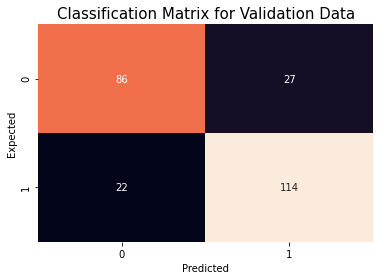

Training Sensitivity       0.875
Valuation Sensitivity      0.838 

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       113
           1       0.81      0.84      0.82       136

    accuracy                           0.80       249
   macro avg       0.80      0.80      0.80       249
weighted avg       0.80      0.80      0.80       249

Specificity:  0.796


In [70]:
lr = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=0.007, random_state = 666)#, class_weight = 'balanced') 
#Note:  Class weight has no effect
lr.fit(Xbdum_train_ss, ybdum_train)
yblr_trainpred = lr.predict(Xbdum_train_ss)
yblr_valpred = lr.predict(Xbdum_val_ss)
modelOutput(ybdum_train, yblr_trainpred, ybdum_val, yblr_valpred)

To get a sense of feature importance, logit was to see coefficients and p-values.  Largest coefficients are sex, exang and ca whose p-values indicates significant to the logistic regression model followed by cp, oldpeak, and thal.

This was not ultimately used, because the selected model uses principal components.

From the p-values in the fourth column, we can see which variables are significant in the prediction of heart disease. P-values less than 0.05 such as: sex, datset, cp,chol, thalch,exang,oldpeak,ca are significant as for the ligistic regression summary. Later on, we are going to confirm and compare these variables importance with other machine learning techniques.

Try regression with PCA
Note: KPCA results were very poor and are not shown here.

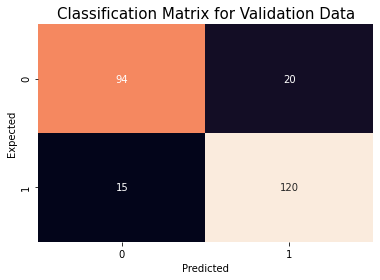

Training Sensitivity       0.88
Valuation Sensitivity      0.889 

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       114
           1       0.86      0.89      0.87       135

    accuracy                           0.86       249
   macro avg       0.86      0.86      0.86       249
weighted avg       0.86      0.86      0.86       249

Specificity:  0.862


In [71]:
lr = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=0.007, random_state = 666)#, class_weight = 'balanced') 
#Note:  Class weight has no effect
lr.fit(Xb_dum_train_pca, yb_dum_train_pca)
yblr_trainpred = lr.predict(Xb_dum_train_pca)
yblr_valpred = lr.predict(Xb_dum_val_pca)
modelOutput(yb_dum_train_pca, yblr_trainpred, yb_dum_val_pca, yblr_valpred)

Focus on PCA version due to the better results.  Tuning of hyper parameter, C, is below.

In [72]:
# Hyper-parameter tuning of C parameter
lrc_param = [0.005, 0.007, 0.008, 0.009, 0.01, 0.1, 1]
lrrecall_train = []
lrrecall_val = []

for c in lrc_param:
    lrC = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=c)
    lrC.fit(Xb_dum_train_pca, yb_dum_train_pca)
    yblrC_trainpred = lrC.predict(Xb_dum_train_pca)
    yblrC_valpred = lrC.predict(Xb_dum_val_pca)
    lrrecall_train.append(round(metrics.recall_score(yb_dum_train_pca, yblrC_trainpred),3))
    lrrecall_val.append(round(metrics.recall_score(yb_dum_val_pca, yblrC_valpred),3))
    
print("Training Sensitivity:    ", lrrecall_train)
print("Validation Sensitivity:  ", lrrecall_val)

Training Sensitivity:     [0.889, 0.88, 0.877, 0.874, 0.874, 0.865, 0.865]
Validation Sensitivity:   [0.896, 0.889, 0.889, 0.874, 0.874, 0.874, 0.874]


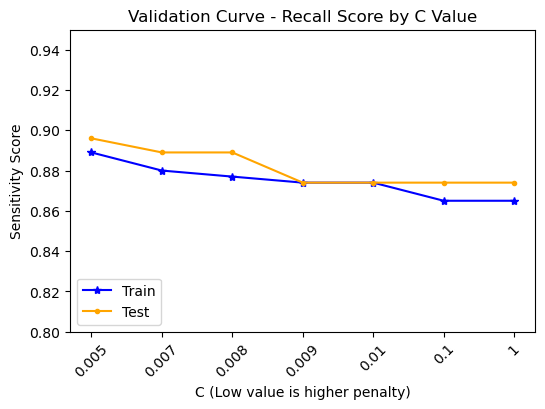

In [73]:

#Validation curve
f, ax = plt.subplots(dpi = 100) #Dont think really need this line
plt.plot(lrrecall_train, marker = '*', color = 'blue', label = 'Train')
plt.plot(lrrecall_val, marker = '.', color = 'orange', label = 'Test')
plt.xticks(np.arange(len(lrc_param)), lrc_param, rotation = 45)
plt.ylim([0.8, 0.95])
plt.xlabel('C (Low value is higher penalty)')
plt.ylabel("Sensitivity Score")
plt.legend(loc = 'lower left')
plt.title("Validation Curve - Recall Score by C Value", fontsize = 12)
plt.show()

Training and test are very close for most values.  Select a combination of the closest and the highest scores.  Selected C of 0.005.

Below is the selected model with C of 0.005.

Logistic regression did not perform as well as K Nearest Neighbors.

Training Sensitivity:    0.889
Valuation Sensitivity:   0.896
Test Sensitivity:        0.898 



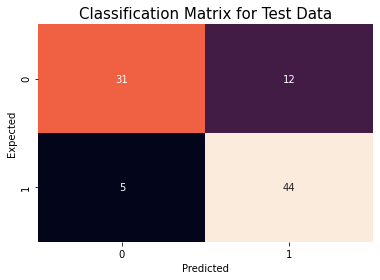

Test Results:               precision    recall  f1-score   support

           0       0.86      0.72      0.78        43
           1       0.79      0.90      0.84        49

    accuracy                           0.82        92
   macro avg       0.82      0.81      0.81        92
weighted avg       0.82      0.82      0.81        92

Specificity:  0.861


In [74]:
lr = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=0.005, random_state = 666)#, class_weight = 'balanced') 
#Note:  Class weight has no effect
lr.fit(Xb_dum_train_pca, yb_dum_train_pca)

yblr_trainpred = lr.predict(Xb_dum_train_pca)
yblr_valpred = lr.predict(Xb_dum_val_pca)
yblr_testpred = lr.predict(Xb_dum_test_pca)
finalOutput(yb_dum_train_pca, yblr_trainpred, yb_dum_val_pca, yblr_valpred, yb_dum_test_pca, yblr_testpred)

In [75]:
print("Regression Coefficients of the Principal Components:\n")
lr.coef_

Regression Coefficients of the Principal Components:



array([[ 0.54910114, -0.05477359, -0.09995237, -0.00839137, -0.03057442,
         0.0614011 , -0.01485999, -0.01833429,  0.04170651, -0.03063555,
         0.09195056]])

# Gaussian Naive Bayesian

We begin modeling with the boolean target variable. Initial testing with the original target variable did not perform well.  We will continue with this assumption for Decision Tree modeling as well.

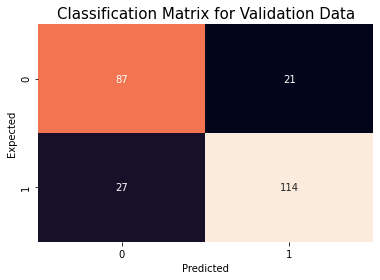

Training Sensitivity       0.845
Valuation Sensitivity      0.809 

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       108
           1       0.84      0.81      0.83       141

    accuracy                           0.81       249
   macro avg       0.80      0.81      0.80       249
weighted avg       0.81      0.81      0.81       249

Specificity:  0.763


In [76]:
# Set up and fit Gaussian Naive Bayes classification
bayes = GaussianNB()
bayes.fit(Xb_train_ss, yb_train)

#Predictions
ybnb_predTrain = bayes.predict(Xb_train_ss)
ybnb_predVal = bayes.predict(Xb_val_ss)
modelOutput(yb_train, ybnb_predTrain, yb_val, ybnb_predVal)

Try Naive Bayes with KPCA and PCA.

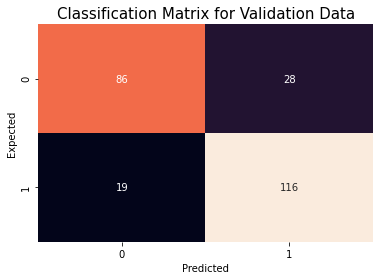

Training Sensitivity       0.837
Valuation Sensitivity      0.859 

              precision    recall  f1-score   support

           0       0.82      0.75      0.79       114
           1       0.81      0.86      0.83       135

    accuracy                           0.81       249
   macro avg       0.81      0.81      0.81       249
weighted avg       0.81      0.81      0.81       249

Specificity:  0.819


In [77]:
# Set up and fit Gaussian Naive Bayes classification
bayes = GaussianNB()
bayes.fit(Xb_train_kpca, yb_train_kpca)

#Predictions
ybnb_predTrain = bayes.predict(Xb_train_kpca)
ybnb_predVal = bayes.predict(Xb_val_kpca)
modelOutput(yb_train_kpca, ybnb_predTrain, yb_val_kpca, ybnb_predVal)

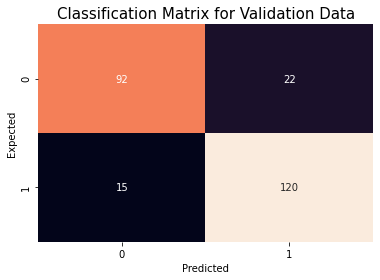

Training Sensitivity       0.852
Valuation Sensitivity      0.889 

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       114
           1       0.85      0.89      0.87       135

    accuracy                           0.85       249
   macro avg       0.85      0.85      0.85       249
weighted avg       0.85      0.85      0.85       249

Specificity:  0.86


In [78]:
# Set up and fit Gaussian Naive Bayes classification
bayes = GaussianNB()
bayes.fit(Xb_train_pca, yb_train_pca)

#Predictions
ybnb_predTrain = bayes.predict(Xb_train_pca)
ybnb_predVal = bayes.predict(Xb_val_pca)
modelOutput(yb_train_pca, ybnb_predTrain, yb_val_pca, ybnb_predVal)

Gaussian Naive Bayes performs best with KPCA components and is the selected model below.  K Nearest Neighbors performs better on the test set.  Test, training and validation recall are the highest and close for Naive Bayes.


Training Sensitivity:    0.852
Valuation Sensitivity:   0.889
Test Sensitivity:        0.816 



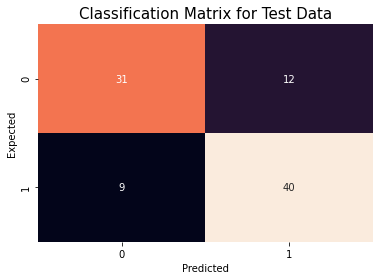

Test Results:               precision    recall  f1-score   support

           0       0.78      0.72      0.75        43
           1       0.77      0.82      0.79        49

    accuracy                           0.77        92
   macro avg       0.77      0.77      0.77        92
weighted avg       0.77      0.77      0.77        92

Specificity:  0.775


In [79]:
#Prediction test data
ybnb_predTest = bayes.predict(Xb_test_pca)
finalOutput(yb_train_pca, ybnb_predTrain, yb_val_pca, ybnb_predVal, yb_test_pca, ybnb_predTest)

# Decision Tree

Decision Tree continues to also train and test our models with our boolean target variable dataset that has proven better results.

In [80]:
#Decision tree - Original target variable is delivering poor results.  Go with boolean.
dt = DecisionTreeClassifier(random_state = 666)#, max_features = 5) #initiate decision tree
# Hyper-parameters:  max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, class_weight=None/balanced
# Class weight has not impact
dt.fit(Xb_train, yb_train) #fit tree with training set
ybdt_predVal = dt.predict(Xb_val) #predict using test set
ybdt_predTrain = dt.predict(Xb_train) #predict using training set
# Accuracy metric for training and test set.
print("Training Sensitivity:  ", round(metrics.recall_score(yb_train, ybdt_predTrain),3))
print("Validation Sensitivity    :  ", round(metrics.recall_score(yb_val, ybdt_predVal),3))

Training Sensitivity:   1.0
Validation Sensitivity    :   0.674


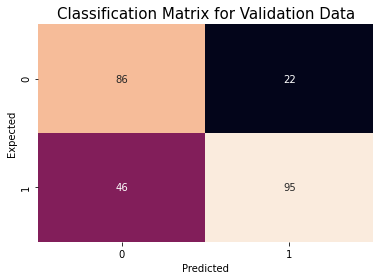

Training Sensitivity       1.0
Valuation Sensitivity      0.674 

              precision    recall  f1-score   support

           0       0.65      0.80      0.72       108
           1       0.81      0.67      0.74       141

    accuracy                           0.73       249
   macro avg       0.73      0.74      0.73       249
weighted avg       0.74      0.73      0.73       249

Specificity:  0.652


In [81]:
modelOutput(yb_train, ybdt_predTrain, yb_val, ybdt_predVal)

Initial false negative results are much poorer than other models which appears to be driving overall model results. Sensitivity is also lower, as expected, and means we do not prefer this model at the moment. We anticipate that Random Forest will do a much better job of classification than the Decision Tree algorithm and will, so we will wait to include PCA and KPCA We will not with Random Forest.  Also, without PCA and KPCA, we will be to be able to identify the importance of the original features.

Tuning of hyper-parameters:  
* Minimum sample split
* Maximum depth
* Number of features.

In [82]:
# Tested multiple min_sample_splits to split a node
min_samples_split = [50, 75, 100, 120, 140, 150, 160]
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 30)

#Loop to run the min_sample_split through the model.  F1 score is collected in score_param list
scores_param = []

for m in min_samples_split:
    dtM = DecisionTreeClassifier(min_samples_split = m, class_weight = 'balanced', random_state = 666)
    scores = cross_val_score(dtM, X = Xb_train, y = yb_train, scoring = "recall", cv = cv)
    scores_param.append(round(scores.mean(),3))
print("Sensitivity scores for each of the minimum sample splits are:  \n", scores_param, '\n')

Sensitivity scores for each of the minimum sample splits are:  
 [0.78, 0.861, 0.861, 0.867, 0.871, 0.871, 0.867] 



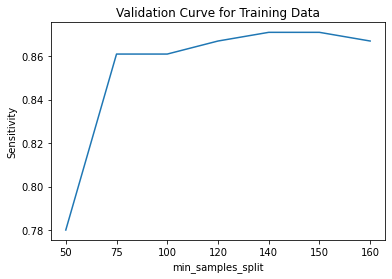

In [83]:
# Plot of F1 score by min_sample_split
plt.plot(scores_param)
plt.xlabel("min_samples_split")
plt.ylabel("Sensitivity")
plt.xticks(np.arange(len(min_samples_split)), min_samples_split)
plt.title("Validation Curve for Training Data")
plt.show()

In [84]:
# Tested multiple max_depth
max_depth = [3,4,5,6,7,8]
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 30)

#Loop to run the min_sample_split through the model.  F1 score is collected in score_param list
scores_param = []

for m in max_depth:
    dtD = DecisionTreeClassifier(max_depth = m, class_weight = 'balanced', random_state = 666)
    dtM.fit(Xb_train, yb_train)
    scores = cross_val_score(dtD, X = Xb_val, y = yb_val, scoring = "recall", cv = cv)
    scores_param.append(round(scores.mean(),3))
print("Sensitivity scores for each of the minimum sample splits are:  \n", scores_param, '\n')

Sensitivity scores for each of the minimum sample splits are:  
 [0.815, 0.85, 0.829, 0.844, 0.801, 0.801] 



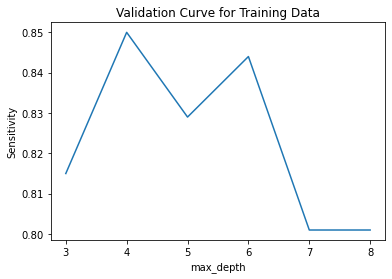

In [85]:
# Plot of F1 score by max_depth
plt.plot(scores_param)
plt.xlabel("max_depth")
plt.ylabel("Sensitivity")
plt.xticks(np.arange(len(max_depth)), max_depth)
plt.title("Validation Curve for Training Data")
plt.show()

In [86]:
# Tested multiple max_features
max_features = [4,5,6,7,8,9,10,11,12,13,14]
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 30)

#Loop to run the min_sample_split through the model.  F1 score is collected in score_param list
scores_param = []

for m in max_features:
    dtF = DecisionTreeClassifier(max_features = m, class_weight = 'balanced', random_state = 666)
    dtM.fit(Xb_train, yb_train)
    scores = cross_val_score(dtF, X = Xb_val, y = yb_val, scoring = "recall", cv = cv)
    scores_param.append(round(scores.mean(),3))
print("Sensitivity scores for each of the minimum sample splits are:  \n", scores_param, '\n')

Sensitivity scores for each of the minimum sample splits are:  
 [0.716, 0.752, 0.808, 0.78, 0.801, 0.773, 0.787, 0.759, 0.801, 0.794, 0.795] 



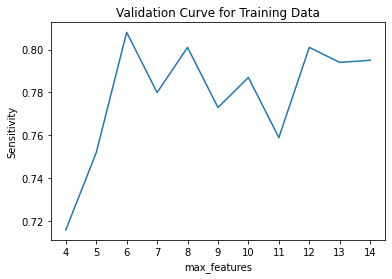

In [87]:
# Plot of F1 score by max_features
plt.plot(scores_param)
plt.xlabel("max_features")
plt.ylabel("Sensitivity")
plt.xticks(np.arange(len(max_features)), max_features)
plt.title("Validation Curve for Training Data")
plt.show()

Grid search on Hyper-parameters:

In [88]:
#Grid search for decision tree on three hyper parameters:  min_samples_split, max_depth, max_features
params = {'min_samples_split' : [50, 100, 120, 140, 150], 
          'max_depth' : [4,5,6], 'max_features' : [4,6,12,13,14]}
dtG = DecisionTreeClassifier(random_state = 666)
gsdt = GridSearchCV(estimator = dtG, param_grid = params, scoring = "recall", cv = cv, n_jobs = -1)

In [89]:
gsdt.fit(Xb_train, yb_train)
print(gsdt.best_params_)
best_estimator = gsdt.best_estimator_

{'max_depth': 4, 'max_features': 12, 'min_samples_split': 100}


In [90]:
ybdtG_predVal = best_estimator.predict(Xb_val) #predict using test set
ybdtG_predTrain = best_estimator.predict(Xb_train) #predict using training set
# Recall metric for training and validation set.
print("Training Sensitivity:    ", round(metrics.recall_score(yb_train, ybdtG_predTrain),3))
print("Validation Sensitivity:  ", round(metrics.recall_score(yb_val, ybdtG_predVal),3))

Training Sensitivity:     0.861
Validation Sensitivity:   0.752


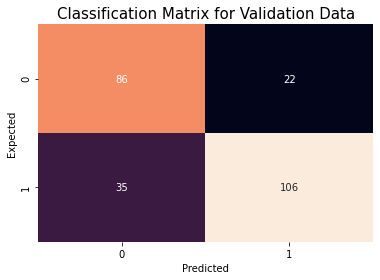

Training Sensitivity       0.861
Valuation Sensitivity      0.752 

              precision    recall  f1-score   support

           0       0.71      0.80      0.75       108
           1       0.83      0.75      0.79       141

    accuracy                           0.77       249
   macro avg       0.77      0.77      0.77       249
weighted avg       0.78      0.77      0.77       249

Specificity:  0.711


In [91]:
modelOutput(yb_train, ybdtG_predTrain, yb_val, ybdtG_predVal)

Chest pain appears to be the most important feature by far followed by dataset location and then sex.

Gridsearch indicates {'max_depth': 4, 'max_features': 12, 'min_samples_split': 100}.  Continued hyper-parameter testing is below and indicates the same parameters except a min_samples_split of 50.

Below is the selected Decision Tree model.  Decision Tree classification does not perform as well as other models particularly with respect to overfitting.  Limiting the features did not have a favorable impact on overfitting.

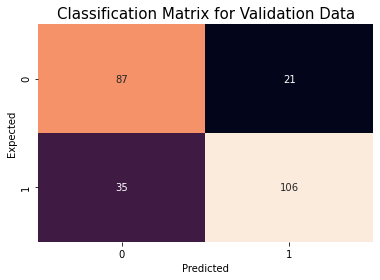

Training Sensitivity       0.858
Valuation Sensitivity      0.752 

              precision    recall  f1-score   support

           0       0.71      0.81      0.76       108
           1       0.83      0.75      0.79       141

    accuracy                           0.78       249
   macro avg       0.77      0.78      0.77       249
weighted avg       0.78      0.78      0.78       249

Specificity:  0.713


In [92]:
dt = DecisionTreeClassifier(random_state = 666, max_depth= 4, max_features= 12, min_samples_split= 50)
dt.fit(Xb_train, yb_train) #fit tree with training set
ybdt_predVal = dt.predict(Xb_val) #predict using validation set
ybdt_predTrain = dt.predict(Xb_train) #predict using training set
ybdt_predTest = dt.predict(Xb_test) #predict using test set
# Sensitivity metric for training and test set.
modelOutput(yb_train, ybdt_predTrain, yb_val, ybdt_predVal)

Training Sensitivity:    0.858
Valuation Sensitivity:   0.752
Test Sensitivity:        0.746 



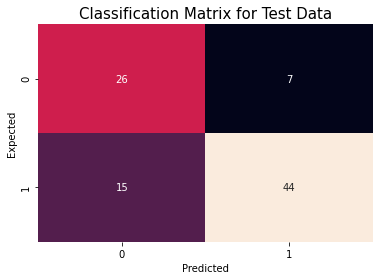

Test Results:               precision    recall  f1-score   support

           0       0.63      0.79      0.70        33
           1       0.86      0.75      0.80        59

    accuracy                           0.76        92
   macro avg       0.75      0.77      0.75        92
weighted avg       0.78      0.76      0.77        92

Specificity:  0.634


In [93]:
finalOutput(yb_train, ybdt_predTrain, yb_val, ybdt_predVal, yb_test, ybdt_predTest)

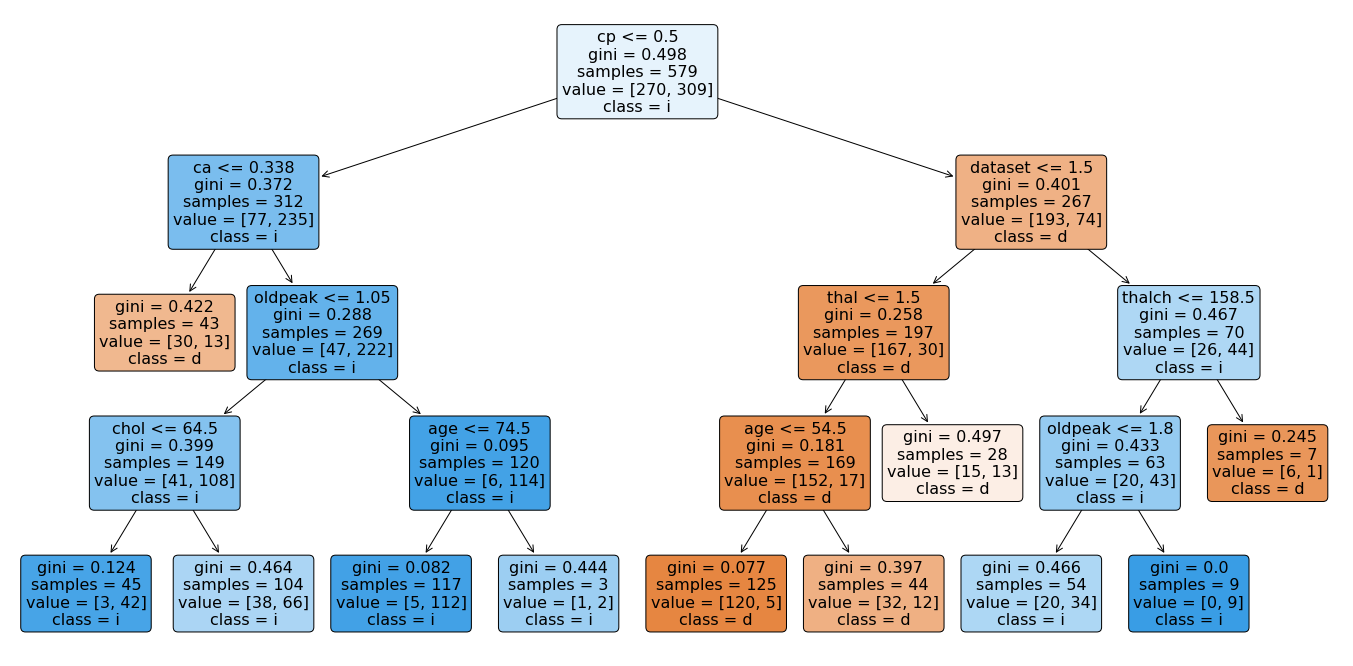

In [94]:
# Plot of decision tree
plt.figure(figsize=(24,12))
a = plot_tree(dt, 
              feature_names=Xb_train.columns.values.tolist(), 
              class_names='disease.present', filled=True, 
              rounded=True, fontsize=16)

Chest Pain Type appears to be the most important feature by far, followed by the dataset (data source).

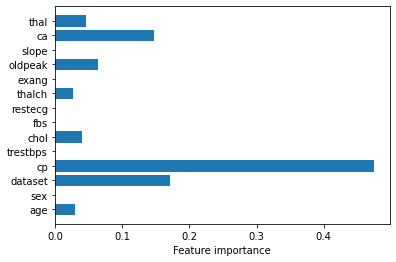

In [95]:
plot_feature_importances(dt, df=Xb_train)

# Random Forest

Unlike the previous Classifiers, we start Random Forest with the original data set, including a non-boolean target variable, and non-standardized data.

In [96]:
# Random Forest
rf = RandomForestClassifier(random_state=666, n_jobs = -1)#class_weight = "balanced")
# Hyper-parameters:  n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='auto'
rf.fit(X_train, y_train)
yrf_predVal = rf.predict(X_val)
yrf_predTrain = rf.predict(X_train)
print("Training Sensitivity:    ", round(metrics.recall_score(y_train, yrf_predTrain, average='weighted'),3))
print("Validation Sensitivity:  ", round(metrics.recall_score(y_val, yrf_predVal, average='weighted'),3))

Training Sensitivity:     1.0
Validation Sensitivity:   0.639


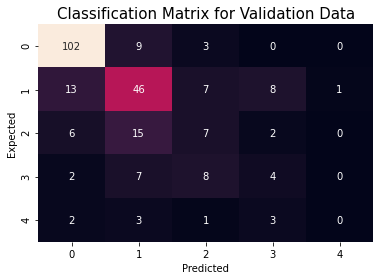

Training Sensitivity  1.0
Test Sensitivity      0.639 

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       114
           1       0.57      0.61      0.59        75
           2       0.27      0.23      0.25        30
           3       0.24      0.19      0.21        21
           4       0.00      0.00      0.00         9

    accuracy                           0.64       249
   macro avg       0.38      0.39      0.38       249
weighted avg       0.60      0.64      0.62       249

Specificity:  0.887


In [97]:
#Confusion matrix heatmap
confusion_matrixR = pd.crosstab(index = y_val, columns = yrf_predVal.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrixR, annot=True, square=False, fmt='', cbar=False)
plt.title("Classification Matrix for Validation Data", fontsize = 15)
plt.show()

print("Training Sensitivity ", round(metrics.recall_score(y_train, yrf_predTrain,average='weighted'),3))
print("Test Sensitivity     ", round(metrics.recall_score(y_val, yrf_predVal,average='weighted'),3), '\n')
print(metrics.classification_report(y_val, yrf_predVal))
specificity(confusion_matrixR)

Modeling with original target variable is poor.  Next we try the boolean target variable.

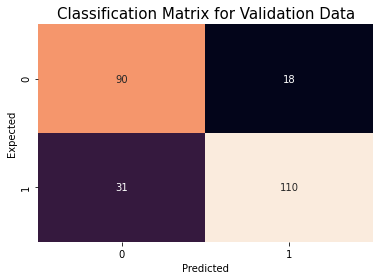

Training Sensitivity       1.0
Valuation Sensitivity      0.78 

              precision    recall  f1-score   support

           0       0.74      0.83      0.79       108
           1       0.86      0.78      0.82       141

    accuracy                           0.80       249
   macro avg       0.80      0.81      0.80       249
weighted avg       0.81      0.80      0.80       249

Specificity:  0.744


In [98]:
# Random Forest
rf = RandomForestClassifier(random_state=666, n_jobs = -1)#class_weight = "balanced")
# Hyper-parameters:  n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='auto'
rf.fit(Xb_train, yb_train)
yrf_predVal = rf.predict(Xb_val)
yrf_predTrain = rf.predict(Xb_train)
modelOutput(yb_train, yrf_predTrain, yb_val, yrf_predVal)

The boolean version performs much better than with the original data, however overfitting is evident. Next we will tune random forest hyper-parameters for the boolean version. 

Minimum sample split, maximum depth, and number of trees are tuned.

In [99]:
# Tested multiple min_sample_splits to split a node
min_samples_split = [3, 5, 7, 10, 25, 50, 100, 150]
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)

#Loop to run the min_sample_split through the model.  Recall score is collected in score_param list
scores_param = []

for m in min_samples_split:
    rfM = RandomForestClassifier(min_samples_split = m, class_weight = 'balanced', random_state=666, n_jobs = -1)
    scores = cross_val_score(rfM, X = Xb_train, y = yb_train, scoring = "recall", cv = cv)
    scores_param.append(round(scores.mean(),3))
print("Sensitivity scores for each of the minimum sample splits are:  \n\n", scores_param)

Sensitivity scores for each of the minimum sample splits are:  

 [0.861, 0.861, 0.864, 0.867, 0.864, 0.864, 0.861, 0.829]


In [100]:
# Tested multiple max_depth
max_depth = [2,3,4,5,6,7,8,10]
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)

#Loop to run the max_depth through the model.  Recall score is collected in score_param list
scores_param = []
for d in max_depth:
    rfD = RandomForestClassifier(max_depth = d, random_state=666, n_jobs = -1) #including class weight made worse
    scores = cross_val_score(rfD, X = Xb_train, y = yb_train, scoring = "recall", cv = cv)
    scores_param.append(round(scores.mean(),3))
print("Training Sensitivity scores for each of the maximum depth are:    \n", scores_param)

Training Sensitivity scores for each of the maximum depth are:    
 [0.871, 0.884, 0.867, 0.884, 0.874, 0.861, 0.854, 0.864]


In [101]:
# Tested multiple n_estimators
n_estimators = [3,5,7,8,9,10,12,25,30,40,50,100]
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)

#Loop to run the n_estimator through the model.  Recall score is collected in score_param list
scores_param = []
for n in n_estimators:
    rfN = RandomForestClassifier(n_estimators = n, random_state = 666, n_jobs = -1) #including class weight made worse
    scores = cross_val_score(rfN, X = Xb_train, y = yb_train, scoring = "recall", cv = cv)
    scores_param.append(round(scores.mean(),3))
print("Sensitivity scores for each of the number of estimators are:    \n", scores_param)

Sensitivity scores for each of the number of estimators are:    
 [0.819, 0.838, 0.844, 0.806, 0.851, 0.812, 0.825, 0.861, 0.845, 0.845, 0.835, 0.861]


Grid Search to tune parameters:

In [102]:
#Grid search for random forest on three hyper parameters:  min_samples_split, max_depth, n_estimators
params = {'min_samples_split' : [5,10,25], 
          'max_depth' : [3,5,6], 'n_estimators' : [25,50,100]}
rfG = RandomForestClassifier(random_state=666)
gsRF = GridSearchCV(estimator = rfG, param_grid = params, scoring = "recall", cv = cv, n_jobs = -1)

In [103]:
gsRF.fit(Xb_train, yb_train)
print(gsRF.best_params_)
best_estimator = gsRF.best_estimator_

{'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}


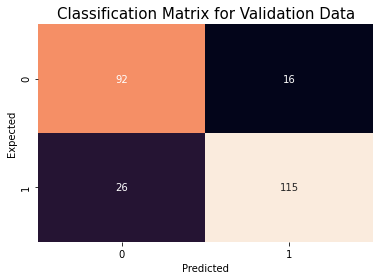

Training Sensitivity       0.893
Valuation Sensitivity      0.816 

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       108
           1       0.88      0.82      0.85       141

    accuracy                           0.83       249
   macro avg       0.83      0.83      0.83       249
weighted avg       0.84      0.83      0.83       249

Specificity:  0.78


In [104]:
yrfg_predTrain = best_estimator.predict(Xb_train)
yrfg_predVal = best_estimator.predict(Xb_val)

modelOutput(yb_train, yrfg_predTrain, yb_val, yrfg_predVal)

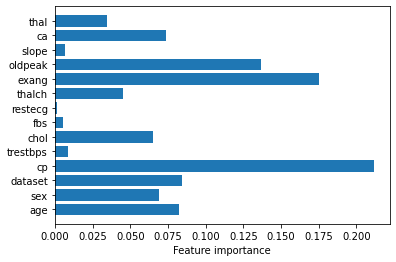

In [105]:
plot_feature_importances(best_estimator, df=Xb_train)

Again, Chest Pain Type is the most important features, but exang and oldpeak are of high importance as well.

Try modeling with PCA and KPCA.  Random Forest Grid Search over various datasets. We will continue to use the feature importance that we have extracted from the above datasets, but we will also test our models on KPCA and PCA data to see if we can get a more performative model.

In [106]:
# Cell takes about 8 minutes to run.
start = time.time()

params = {"n_estimators":[50, 70, 100],
         "max_depth": [3, 5, 6, 7, 9, 11], 
         "min_samples_split": [5, 10, 25],
         "min_samples_leaf": [5, 10],
         "max_features": ["log2"]}

dataX_train = [Xb_train_kpca, X_train_pca, Xb_train_pca]
dataX_val = [Xb_val_kpca, X_val_pca, Xb_val_pca]
dataY_train = [yb_train_kpca, y_train_pca, yb_train_pca]
dataY_val = [yb_val_kpca, y_val_pca, yb_val_pca]
names = ["Boolean KPCA Dataset", "PCA Dataset", "Boolean PCA Dataset"]

for i in range(0, 3):
  print("\n Using:", names[i], "\n")

  rf = GridSearchCV(RandomForestClassifier(random_state = 666, n_jobs = -1), param_grid=params, cv=cv)
  rf.fit(dataX_train[i], dataY_train[i])

  train_pred = rf.predict(dataX_train[i])
  val_pred = rf.predict(dataX_val[i]) 

  print("Training Sensitivity:", math.sqrt(round(metrics.recall_score(dataY_train[i], train_pred, average='weighted'),3)))
  print("Validation Sensitivity:", math.sqrt(round(metrics.recall_score(dataY_val[i], val_pred, average='weighted'),3)))

  print("Training Accuracy:", round(metrics.balanced_accuracy_score(dataY_train[i], train_pred), 3))
  print("Validation Accuracy:", round(metrics.balanced_accuracy_score(dataY_val[i], val_pred), 3))

  print(rf.best_params_)

end = time.time()
print(end - start)


 Using: Boolean KPCA Dataset 

Training Sensitivity: 0.9596874491208063
Validation Sensitivity: 0.9159694318043589
Training Accuracy: 0.915
Validation Accuracy: 0.831
{'max_depth': 11, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 25, 'n_estimators': 50}

 Using: PCA Dataset 

Training Sensitivity: 0.764198926981712
Validation Sensitivity: 0.7861297602813418
Training Accuracy: 0.33
Validation Accuracy: 0.317
{'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 50}

 Using: Boolean PCA Dataset 

Training Sensitivity: 0.9327379053088815
Validation Sensitivity: 0.9224966124599049
Training Accuracy: 0.862
Validation Accuracy: 0.847
{'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 25, 'n_estimators': 50}
143.33972883224487


Best choice of a classification model is with KPCA below followed by PCA.  Further fine-tuned hyper-parameters results for PCA and KPCA are below.  These are the selected Random Forest models.

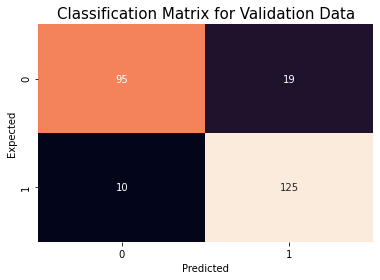

Training Sensitivity       0.954
Valuation Sensitivity      0.926 

              precision    recall  f1-score   support

           0       0.90      0.83      0.87       114
           1       0.87      0.93      0.90       135

    accuracy                           0.88       249
   macro avg       0.89      0.88      0.88       249
weighted avg       0.88      0.88      0.88       249

Specificity:  0.905


In [107]:
rf1 = RandomForestClassifier(max_depth=11, max_features=8, min_samples_leaf=7, min_samples_split=20, n_estimators=60, random_state = 666)
rf1.fit(Xb_train_kpca, yb_train_kpca)

train_pred = rf1.predict(Xb_train_kpca)
val_pred = rf1.predict(Xb_val_kpca)
test_pred = rf1.predict(Xb_test_kpca)

modelOutput(yb_train_kpca, train_pred, yb_val_kpca, val_pred)

Training Sensitivity:    0.954
Valuation Sensitivity:   0.926
Test Sensitivity:        0.898 



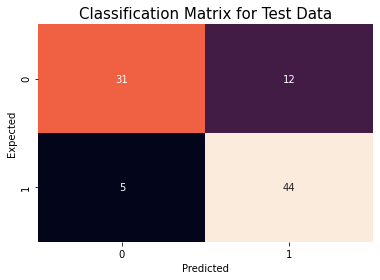

Test Results:               precision    recall  f1-score   support

           0       0.86      0.72      0.78        43
           1       0.79      0.90      0.84        49

    accuracy                           0.82        92
   macro avg       0.82      0.81      0.81        92
weighted avg       0.82      0.82      0.81        92

Specificity:  0.861


In [108]:
finalOutput(yb_train_kpca, train_pred, yb_val_kpca, val_pred, yb_test_kpca, test_pred)

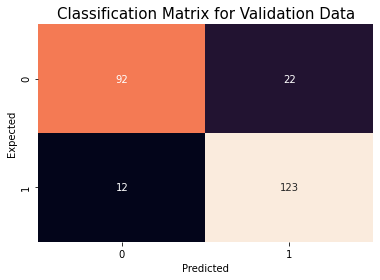

Training Sensitivity       0.935
Valuation Sensitivity      0.911 

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       114
           1       0.85      0.91      0.88       135

    accuracy                           0.86       249
   macro avg       0.87      0.86      0.86       249
weighted avg       0.86      0.86      0.86       249

Specificity:  0.885


In [109]:
rf2 = RandomForestClassifier(max_depth=11, max_features=3, min_samples_leaf=5, min_samples_split=25, n_estimators=60, random_state = 666)
rf2.fit(Xb_train_pca, yb_train_pca)

train_pred = rf2.predict(Xb_train_pca)
val_pred = rf2.predict(Xb_val_pca) 
test_pred = rf2.predict(Xb_test_pca)

modelOutput(yb_train_pca, train_pred, yb_val_pca, val_pred)

Training Sensitivity:    0.935
Valuation Sensitivity:   0.911
Test Sensitivity:        0.857 



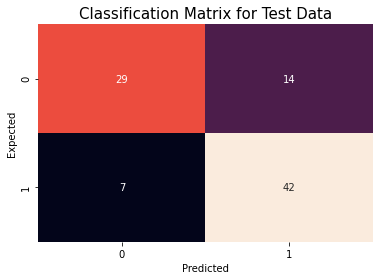

Test Results:               precision    recall  f1-score   support

           0       0.81      0.67      0.73        43
           1       0.75      0.86      0.80        49

    accuracy                           0.77        92
   macro avg       0.78      0.77      0.77        92
weighted avg       0.78      0.77      0.77        92

Specificity:  0.806


In [110]:
finalOutput(yb_train_pca, train_pred, yb_val_pca, val_pred, yb_test_pca, test_pred)

Grid search reduced overfitting.  Continued hyper-parameter testing delivered improved results over grid seach.  Random Forest with KPCA delivered the best results.  Thus far, test results are best for Logistic Regression and Random Forest with KPCA.

Grid search reduces the overfitting.

# AdaBoost

We begin Adaboost by using decision stumps as the weak learner.

In [111]:
adaboost = AdaBoostClassifier(n_estimators=100,learning_rate=0.1, random_state=0)  # Base estimator Decision tree
scores = cross_val_score(adaboost, Xbdum_train, ybdum_train, scoring = 'recall', cv=5)
scores.mean()

0.853125

In [112]:
adaboost = AdaBoostClassifier(random_state=0)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
params = dict(
    learning_rate = [0.5,0.1,1,2], 
    n_estimators = [50,100,200],)
gs = GridSearchCV(estimator=adaboost, param_grid=params, scoring='recall', cv=cv, n_jobs=-1, )
gs.fit(Xbdum_train, ybdum_train)
gs.best_estimator_

AdaBoostClassifier(learning_rate=0.1, random_state=0)

In [113]:
adaboost = AdaBoostClassifier(n_estimators=200, learning_rate=0.1,random_state=0)  # Base estimator Decision tree
adaboost.fit(Xbdum_train, ybdum_train)
y_pred = adaboost.predict(Xbdum_val)
print(metrics.classification_report(ybdum_val, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.80      0.80       113
           1       0.83      0.84      0.84       136

    accuracy                           0.82       249
   macro avg       0.82      0.82      0.82       249
weighted avg       0.82      0.82      0.82       249



In [114]:
y_pred = adaboost.predict(Xbdum_test)
print(metrics.classification_report(ybdum_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        39
           1       0.84      0.89      0.86        53

    accuracy                           0.84        92
   macro avg       0.84      0.83      0.83        92
weighted avg       0.84      0.84      0.84        92



Next we try Adaboost using Gausian Naive Bayes as the weak learner.

In [115]:
gnb = GaussianNB()
adaboost = AdaBoostClassifier(base_estimator=gnb, n_estimators=100, learning_rate=0.1,random_state=0)  # Base estimator Decision tree
adaboost.fit(Xbdum_train, ybdum_train)
y_pred = adaboost.predict(Xbdum_val)
print(metrics.classification_report(ybdum_val, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       113
           1       0.82      0.85      0.83       136

    accuracy                           0.82       249
   macro avg       0.81      0.81      0.81       249
weighted avg       0.82      0.82      0.81       249



In [116]:
y_pred = adaboost.predict(Xbdum_test)
print(metrics.classification_report(ybdum_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        39
           1       0.85      0.85      0.85        53

    accuracy                           0.83        92
   macro avg       0.82      0.82      0.82        92
weighted avg       0.83      0.83      0.83        92



Next we try Adaboost using Perceptron as the weak learner.

In [117]:
perceptron = Perceptron(random_state=0)
adaboost = AdaBoostClassifier(base_estimator=perceptron, n_estimators=200, learning_rate=0.5,random_state=0, algorithm = 'SAMME')  # Base estimator Decision tree
adaboost.fit(Xbdum_train, ybdum_train)
y_pred = adaboost.predict(Xbdum_val)
print(metrics.classification_report(ybdum_val, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69       113
           1       0.74      0.73      0.74       136

    accuracy                           0.71       249
   macro avg       0.71      0.71      0.71       249
weighted avg       0.72      0.71      0.72       249



              precision    recall  f1-score   support

           0       0.51      0.59      0.55        39
           1       0.66      0.58      0.62        53

    accuracy                           0.59        92
   macro avg       0.59      0.59      0.58        92
weighted avg       0.60      0.59      0.59        92



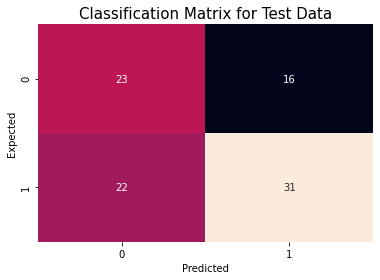

In [118]:
y_pred = adaboost.predict(Xbdum_test)
print(metrics.classification_report(ybdum_test, y_pred))

confusion_matrix = pd.crosstab(index = ybdum_test, columns = y_pred.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Classification Matrix for Test Data", fontsize = 15)
plt.show()

We get our best results from the Gaussian Bayes weak learner. The results are good, but not the best we've seen. We will try tuning the hyper-parameters or using other datasets we created as well in future testing.

We will now trying using the Gaussian Bayes as the weak learner with PCA and KPCA before tuning our hyper-parameters on the best data set.

**Boolean KPCA Data with Dummy Variables**

In [119]:
gnb = GaussianNB()
adaboost = AdaBoostClassifier(base_estimator=gnb, n_estimators=75, learning_rate=0.1,random_state=0)  # Base estimator Decision tree
adaboost.fit(Xb_dum_train_kpca, yb_dum_train_kpca)
y_pred = adaboost.predict(Xb_dum_val_kpca)
print(metrics.classification_report(yb_dum_val_kpca, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       114
           1       0.87      0.90      0.89       135

    accuracy                           0.88       249
   macro avg       0.88      0.87      0.87       249
weighted avg       0.88      0.88      0.88       249



In [120]:
y_pred = adaboost.predict(Xb_dum_test_kpca)
print(metrics.classification_report(yb_dum_test_kpca, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        43
           1       0.78      0.92      0.84        49

    accuracy                           0.82        92
   macro avg       0.83      0.81      0.81        92
weighted avg       0.83      0.82      0.81        92



**Boolean KPCA Data without Dummy Variables**

In [121]:
gnb = GaussianNB()
adaboost = AdaBoostClassifier(base_estimator=gnb, n_estimators=100, learning_rate=0.1,random_state=0)  # Base estimator Decision tree
adaboost.fit(Xb_train_kpca, yb_train_kpca)
y_pred = adaboost.predict(Xb_val_kpca)
print(metrics.classification_report(yb_val_kpca, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76       114
           1       0.78      0.84      0.81       135

    accuracy                           0.79       249
   macro avg       0.79      0.78      0.78       249
weighted avg       0.79      0.79      0.79       249



In [122]:
y_pred = adaboost.predict(Xb_test_kpca)
print(metrics.classification_report(yb_test_kpca, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81        43
           1       0.80      0.92      0.86        49

    accuracy                           0.84        92
   macro avg       0.85      0.83      0.83        92
weighted avg       0.84      0.84      0.84        92



**Boolean PCA Data without Dummy Variables**

In [123]:
gnb = GaussianNB()
adaboost = AdaBoostClassifier(base_estimator=gnb, n_estimators=100, learning_rate=0.1,random_state=0)  # Base estimator Decision tree
adaboost.fit(Xb_train_pca, yb_train_pca)
y_pred = adaboost.predict(Xb_val_pca)
print(metrics.classification_report(yb_val_pca, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       114
           1       0.87      0.87      0.87       135

    accuracy                           0.86       249
   macro avg       0.86      0.86      0.86       249
weighted avg       0.86      0.86      0.86       249



In [124]:
y_pred = adaboost.predict(Xb_test_pca)
print(metrics.classification_report(yb_test_pca, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73        43
           1       0.75      0.82      0.78        49

    accuracy                           0.76        92
   macro avg       0.76      0.76      0.76        92
weighted avg       0.76      0.76      0.76        92



Our best model above actually comes from using KPCA Boolean data, without dummy variables. We did not expect this result, but will try tuning the parameters on this model next.

In [125]:
# Tested multiple learning_rate to split a node
learning_rate = [0.01,0.1,.5,1]
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 30)

#Loop to run the learning_rate through the model.  Accuracy is collected in score_param list
scores_param = []

for m in learning_rate:
    dtM = AdaBoostClassifier(base_estimator=GaussianNB(),
                   learning_rate=m, random_state=None)
    scores = cross_val_score(dtM, X = Xb_train_kpca, y = yb_train_kpca, scoring = "recall", cv = cv)
    scores_param.append(round(scores.mean(),3))
print("Sensitivity scores for each of the minimum sample splits are:  \n", scores_param, '\n')

Sensitivity scores for each of the minimum sample splits are:  
 [0.843, 0.782, 0.865, 0.646] 



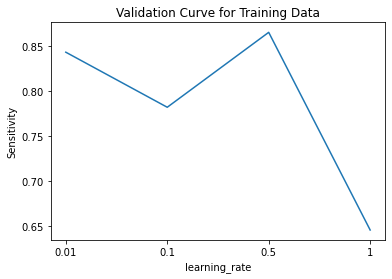

In [126]:
# Plot of F1 score by learning_rate
plt.plot(scores_param)
plt.xlabel("learning_rate")
plt.ylabel("Sensitivity")
plt.xticks(np.arange(len(learning_rate)), learning_rate)
plt.title("Validation Curve for Training Data")
plt.show()

In [127]:
# Tested multiple n_estimators to split a node
n_estimators=[25,50,100,200,250]
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 30)

#Loop to run the n_estimators through the model.  Accuracy is collected in score_param list
scores_param = []

for m in n_estimators:
    dtM = AdaBoostClassifier(base_estimator=GaussianNB(),
                   n_estimators=m, random_state=None, learning_rate=0.1)
    scores = cross_val_score(dtM, X = Xb_train_kpca, y = yb_train_kpca, scoring = "recall", cv = cv)
    scores_param.append(round(scores.mean(),3))
print("Sensitivity scores for each of the minimum sample splits are:  \n", scores_param, '\n')

Sensitivity scores for each of the minimum sample splits are:  
 [0.794, 0.782, 0.782, 0.775, 0.763] 



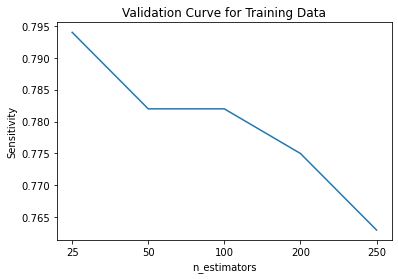

In [128]:
# Plot of F1 score by n_estimators
plt.plot(scores_param)
plt.xlabel("n_estimators")
plt.ylabel("Sensitivity")
plt.xticks(np.arange(len(n_estimators)), n_estimators)
plt.title("Validation Curve for Training Data")
plt.show()

In [129]:
abc = AdaBoostClassifier(base_estimator=GaussianNB(),
                   learning_rate=0.5, n_estimators=50, random_state=None)

abc.fit(Xb_train_kpca, yb_train_kpca)
y_pred = abc.predict(Xb_val_kpca)
print(metrics.classification_report(yb_val_kpca, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.94      0.69       114
           1       0.87      0.34      0.49       135

    accuracy                           0.61       249
   macro avg       0.71      0.64      0.59       249
weighted avg       0.72      0.61      0.58       249



              precision    recall  f1-score   support

           0       0.51      0.91      0.65        43
           1       0.73      0.22      0.34        49

    accuracy                           0.54        92
   macro avg       0.62      0.57      0.50        92
weighted avg       0.63      0.54      0.49        92



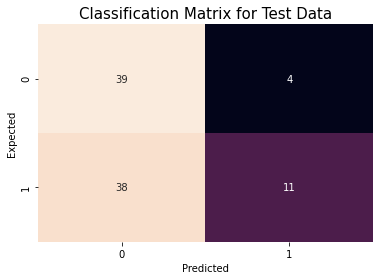

In [130]:
y_pred = abc.predict(Xb_test_kpca)
print(metrics.classification_report(yb_test_kpca, y_pred))
confusion_matrix = pd.crosstab(index = yb_test_kpca, columns = y_pred.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Classification Matrix for Test Data", fontsize = 15)
plt.show()

The parameter tuning points us to n_estimators of 50, and the learning rate is pretty similar, so we tried out multiple and got the best results with a learning rate of 0.5.

The results of tuning didn't make a large difference, but the results were about 1% more accurate.

# Gradient Boost

In [131]:
gboost = GradientBoostingClassifier (random_state=0)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
params = dict(
    min_samples_split = [2,5,10,20,50,100], 
    learning_rate = [0.01,0.1,1,10],
    n_estimators=[50,100,200],)
gs = GridSearchCV(estimator=gboost, param_grid=params, scoring='recall', cv=cv, n_jobs=-1, )
gs.fit(Xbdum_train, ybdum_train)
gs.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, min_samples_split=50,
                           n_estimators=200, random_state=0)

In [132]:
gboost = GradientBoostingClassifier(n_estimators=200, random_state=0, min_samples_split=50,learning_rate = 0.01)
gboost.fit(Xbdum_train, ybdum_train)
y_pred = gboost.predict(Xbdum_val)
print(metrics.classification_report(ybdum_val, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.74      0.77       113
           1       0.80      0.84      0.82       136

    accuracy                           0.80       249
   macro avg       0.79      0.79      0.79       249
weighted avg       0.80      0.80      0.79       249



In [133]:
y_pred = gboost.predict(Xbdum_test)
print(metrics.classification_report(ybdum_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78        39
           1       0.85      0.83      0.84        53

    accuracy                           0.82        92
   macro avg       0.81      0.81      0.81        92
weighted avg       0.82      0.82      0.82        92



We get a strong classifier from our Gradient Boost with tuned hyper-parameters. The next step will be to continue exploring Gradient Boost with our KPCA data set and exploring hyper-tuning if the results are strong.

In [134]:
gboost = GradientBoostingClassifier (random_state=0)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
params = dict(
    min_samples_split = [5,10,50,100], 
    learning_rate = [0.01,0.1,1],
    n_estimators=[50,100,200],
    max_depth=[3,5,7,10],
    max_features=["log2", "auto"])
gs = GridSearchCV(estimator=gboost, param_grid=params, scoring='recall', cv=cv, n_jobs=-1, )
gs.fit(Xb_dum_train_kpca, yb_dum_train_kpca)
gs.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, max_features='log2',
                           min_samples_split=5, n_estimators=50,
                           random_state=0)

In [135]:
gboost = GradientBoostingClassifier(n_estimators=100, random_state=0, min_samples_leaf=2, min_samples_split=5,learning_rate=0.1, max_features='log2', max_depth=5)
gboost.fit(Xb_dum_train_kpca, yb_dum_train_kpca)
y_pred = gboost.predict(Xb_dum_val_kpca)
print(metrics.classification_report(yb_dum_val_kpca, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.82      0.84       114
           1       0.86      0.89      0.87       135

    accuracy                           0.86       249
   macro avg       0.86      0.86      0.86       249
weighted avg       0.86      0.86      0.86       249



              precision    recall  f1-score   support

           0       0.85      0.81      0.83        43
           1       0.84      0.88      0.86        49

    accuracy                           0.85        92
   macro avg       0.85      0.85      0.85        92
weighted avg       0.85      0.85      0.85        92



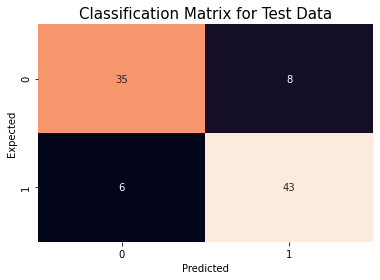

In [136]:
y_pred = gboost.predict(Xb_dum_test_kpca)
print(metrics.classification_report(yb_dum_test_kpca, y_pred))
confusion_matrix = pd.crosstab(index = yb_dum_test_kpca, columns = y_pred.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Classification Matrix for Test Data", fontsize = 15)
plt.show()

By using GridSearch and testing with some changes to the n_estimators and learning_rate after, we are able to see a strong predictor using KPCA. The accuracy and recall surpass the non-kpca data, so we will use these results as our best Gradient Boost model so far.

# SVM

## Kernel RBF SVM

In [137]:
estimator = SVC(kernel ='rbf')
params = dict(
    gamma = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10 ],
    C = [0.00001, 0.0001, 0.001, 0.01,0.05, 1, 10],)
params
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
gs = GridSearchCV(estimator=estimator, param_grid=params, scoring='recall', cv=cv, n_jobs=-1, )
gs.fit(Xbdum_train,ybdum_train)
gs.best_estimator_

SVC(C=1e-05, gamma=1e-05)

In [138]:
svc = SVC(kernel ='rbf', C=10, gamma=0.0001)
svc.fit(Xbdum_train, ybdum_train)

y_pred =  svc.predict(Xbdum_val)
print(metrics.classification_report(ybdum_val, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70       113
           1       0.76      0.75      0.75       136

    accuracy                           0.73       249
   macro avg       0.73      0.73      0.73       249
weighted avg       0.73      0.73      0.73       249



In [139]:
y_pred =  svc.predict(Xbdum_test)
print(metrics.classification_report(ybdum_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.67      0.63        39
           1       0.73      0.68      0.71        53

    accuracy                           0.67        92
   macro avg       0.67      0.67      0.67        92
weighted avg       0.68      0.67      0.68        92



Below we test our Kernel RBF SVC on Dummy Variable KPCA data to find the best hyper-parameters.

In [140]:
svc = SVC(kernel ='rbf', C=100, gamma=.1)
svc.fit(Xb_dum_train_kpca, yb_dum_train_kpca)

y_pred =  svc.predict(Xb_dum_val_kpca)
print(metrics.classification_report(yb_dum_val_kpca, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       114
           1       0.82      0.90      0.86       135

    accuracy                           0.84       249
   macro avg       0.84      0.83      0.84       249
weighted avg       0.84      0.84      0.84       249



In [141]:
y_pred =  svc.predict(Xb_dum_test_kpca)
print(metrics.classification_report(yb_dum_test_kpca, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.70      0.77        43
           1       0.77      0.90      0.83        49

    accuracy                           0.80        92
   macro avg       0.81      0.80      0.80        92
weighted avg       0.81      0.80      0.80        92



We do see significant improvements to the Kernel RBF SVM model when using KernelPCA Dummy Variable data. We attempt to also find improvements below by removing the dummy variables.

In both, we increase the C value by a large amount to increase the penalty, and gamme is situated at around 1/(number of features).

In [142]:
svc = SVC(kernel ='rbf', C=1000, gamma=.1)
svc.fit(Xb_train_kpca, yb_train_kpca)

y_pred =  svc.predict(Xb_val_kpca)
print(metrics.classification_report(yb_val_kpca, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       114
           1       0.83      0.84      0.84       135

    accuracy                           0.82       249
   macro avg       0.82      0.82      0.82       249
weighted avg       0.82      0.82      0.82       249



              precision    recall  f1-score   support

           0       0.72      0.72      0.72        43
           1       0.76      0.76      0.76        49

    accuracy                           0.74        92
   macro avg       0.74      0.74      0.74        92
weighted avg       0.74      0.74      0.74        92



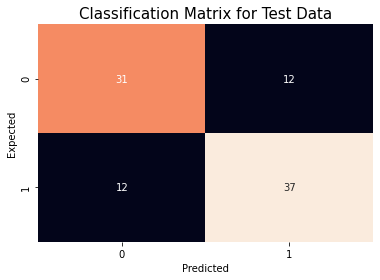

In [143]:
y_pred =  svc.predict(Xb_test_kpca)
print(metrics.classification_report(yb_test_kpca, y_pred))
confusion_matrix = pd.crosstab(index = yb_test_kpca, columns = y_pred.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Classification Matrix for Test Data", fontsize = 15)
plt.show()

Overall, we get very strong results from our KPCA data. It is a good sign, and we will also attempt to apply KPCA data to our Linear SVC which had the strongest results of all our models before applying KPCA.

## Linear SVC

In [144]:
estimator = SVC(kernel ='linear')
params = dict(
    C = [0.00001, 0.0001, 0.001, 0.01,0.05, 1, 10],)
params
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
gs = GridSearchCV(estimator=estimator, param_grid=params, scoring='recall', cv=cv, n_jobs=-1, )
gs.fit(Xbdum_train,ybdum_train)
gs.best_estimator_

SVC(C=10, kernel='linear')

In [145]:
svc_lr = SVC(kernel ='linear',C=10)
svc_lr.fit(Xbdum_train,ybdum_train)

y_pred =  svc_lr.predict(Xbdum_val)
print(metrics.classification_report(ybdum_val, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77       113
           1       0.81      0.83      0.82       136

    accuracy                           0.80       249
   macro avg       0.80      0.80      0.80       249
weighted avg       0.80      0.80      0.80       249



In [146]:
y_pred =  svc_lr.predict(Xbdum_test)
print(metrics.classification_report(ybdum_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        39
           1       0.87      0.89      0.88        53

    accuracy                           0.86        92
   macro avg       0.86      0.85      0.85        92
weighted avg       0.86      0.86      0.86        92



Our SVM work concludes that the Linear SVC is our best SVM classifier so far, closely followed by our Kernel RBF SVC. Both would be worth further exploration to find if we can improve the results through further hyper-parameter testing or using additional data sets we have created.

In [147]:
estimator = SVC(kernel ='linear')
params = dict(
    C = [0.00001, 0.0001, 0.001, 0.01,0.05, 1, 10],)
params
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
gs = GridSearchCV(estimator=estimator, param_grid=params, scoring='recall', cv=cv, n_jobs=-1, )
gs.fit(Xb_dum_train_kpca, yb_dum_train_kpca)
gs.best_estimator_

SVC(C=1e-05, kernel='linear')

In [148]:
svc_lr = SVC(kernel='linear', C=10)
svc_lr.fit(Xb_dum_train_kpca,yb_dum_train_kpca)

y_pred =  svc_lr.predict(Xb_dum_val_kpca)
print(metrics.classification_report(yb_dum_val_kpca, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       114
           1       0.83      0.90      0.86       135

    accuracy                           0.84       249
   macro avg       0.85      0.84      0.84       249
weighted avg       0.84      0.84      0.84       249



              precision    recall  f1-score   support

           0       0.86      0.70      0.77        43
           1       0.77      0.90      0.83        49

    accuracy                           0.80        92
   macro avg       0.81      0.80      0.80        92
weighted avg       0.81      0.80      0.80        92



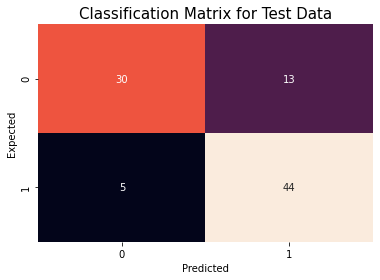

In [149]:
y_pred =  svc_lr.predict(Xb_dum_test_kpca)
print(metrics.classification_report(yb_dum_test_kpca, y_pred))
confusion_matrix = pd.crosstab(index = yb_dum_test_kpca, columns = y_pred.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Classification Matrix for Test Data", fontsize = 15)
plt.show()

We cannot improve our Linear SVC with KPCA data and hyper-tuning. So our best model is still Linear SVC, but closely followed by both Gradient Boost and Kernel RBF SVC, both of which with KPCA provide performance close to Linear SVC.

# Bagging

Variability across runs of an algorithm led us in the direction of bagging.  K Nearest Neighbors, Logistic Regression, Naive Bayes, and Random Forest are performed with bagging.

**KNN with Bagging**

Bagging improves KNN classification.

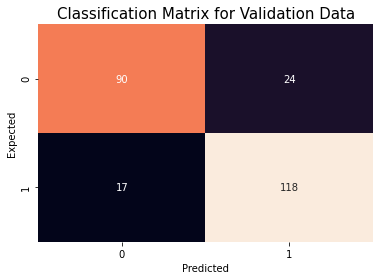

Training Sensitivity       1.0
Valuation Sensitivity      0.874 

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       114
           1       0.83      0.87      0.85       135

    accuracy                           0.84       249
   macro avg       0.84      0.83      0.83       249
weighted avg       0.84      0.84      0.83       249

Specificity:  0.841
/n
Training Sensitivity:    1.0
Valuation Sensitivity:   0.874
Test Sensitivity:        0.837 



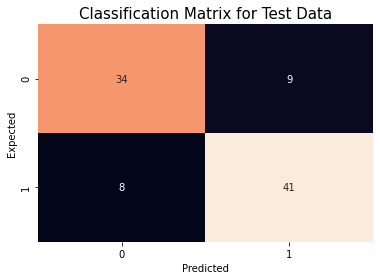

Test Results:               precision    recall  f1-score   support

           0       0.81      0.79      0.80        43
           1       0.82      0.84      0.83        49

    accuracy                           0.82        92
   macro avg       0.81      0.81      0.81        92
weighted avg       0.82      0.82      0.82        92

Specificity:  0.81


In [150]:
knn = KNeighborsClassifier(n_neighbors = 15, weights = 'distance', p=2) #weights very mildly helps, p=2 manhattan distance mildly helps
knnbag = BaggingClassifier(base_estimator=knn, n_estimators=100)
scores = cross_val_score(knnbag, Xb_train_kpca, yb_train_kpca, cv=5, scoring = "recall")
scores.mean()

knnbag.fit(Xb_train_kpca, yb_train_kpca)

b_predNNTrain_bag = knnbag.predict(Xb_train_kpca)
b_predNNVal_bag = knnbag.predict(Xb_val_kpca)
b_predNNTest_bag = knnbag.predict(Xb_test_kpca)

modelOutput(yb_train_kpca, b_predNNTrain_bag, yb_val_kpca, b_predNNVal_bag)
print("/n")
finalOutput(yb_train_kpca, b_predNNTrain_bag, yb_val_kpca, b_predNNVal_bag, yb_test_kpca, b_predNNTest_bag)

**Logistic Regression**

Bagging does not improve regression modeling.

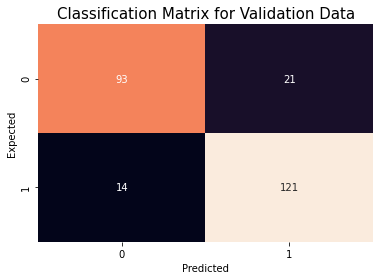

Training Sensitivity       0.886
Valuation Sensitivity      0.896 

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       114
           1       0.85      0.90      0.87       135

    accuracy                           0.86       249
   macro avg       0.86      0.86      0.86       249
weighted avg       0.86      0.86      0.86       249

Specificity:  0.869


Training Sensitivity:    0.886
Valuation Sensitivity:   0.896
Test Sensitivity:        0.898 



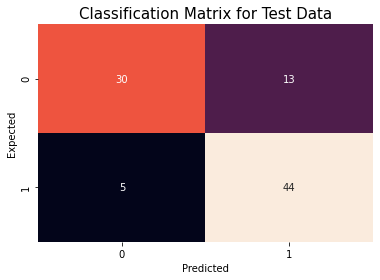

Test Results:               precision    recall  f1-score   support

           0       0.86      0.70      0.77        43
           1       0.77      0.90      0.83        49

    accuracy                           0.80        92
   macro avg       0.81      0.80      0.80        92
weighted avg       0.81      0.80      0.80        92

Specificity:  0.857


In [151]:
logreg = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=0.005, random_state = 666)
lrbag = BaggingClassifier(base_estimator=logreg, n_estimators=100)
scores = cross_val_score(lrbag, Xb_dum_train_pca, yb_dum_train_pca, cv=5, scoring = "recall")
scores.mean()

#lr = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=0.005, random_state = 666)#, class_weight = 'balanced') 
#Note:  Class weight has no effect
lrbag.fit(Xb_dum_train_pca, yb_dum_train_pca)

yblrbag_trainpred = lrbag.predict(Xb_dum_train_pca)
yblrbag_valpred = lrbag.predict(Xb_dum_val_pca)
yblrbag_testpred = lrbag.predict(Xb_dum_test_pca)

modelOutput(yb_dum_train_pca, yblrbag_trainpred, yb_dum_val_pca, yblrbag_valpred)
print("\n")
finalOutput(yb_dum_train_pca, yblrbag_trainpred, yb_dum_val_pca, yblrbag_valpred, yb_dum_test_pca, yblrbag_testpred)

**Gaussian Naive Bayes**

Bagging slightly improves Bayes modeling.

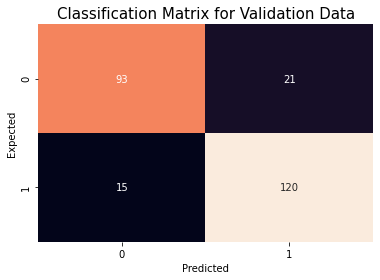

Training Sensitivity       0.855
Valuation Sensitivity      0.889 

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       114
           1       0.85      0.89      0.87       135

    accuracy                           0.86       249
   macro avg       0.86      0.85      0.85       249
weighted avg       0.86      0.86      0.86       249

Specificity:  0.861


Training Sensitivity:    0.855
Valuation Sensitivity:   0.889
Test Sensitivity:        0.816 



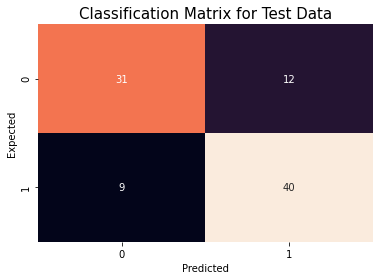

Test Results:               precision    recall  f1-score   support

           0       0.78      0.72      0.75        43
           1       0.77      0.82      0.79        49

    accuracy                           0.77        92
   macro avg       0.77      0.77      0.77        92
weighted avg       0.77      0.77      0.77        92

Specificity:  0.775


In [152]:
gb = GaussianNB()
gbbag = BaggingClassifier(base_estimator=gb, n_estimators=100)
scores = cross_val_score(gbbag, Xb_train_pca, yb_train_pca, cv=5, scoring = "recall")
scores.mean()

gbbag.fit(Xb_train_pca, yb_train_pca)

ybnbbag_predTrain = gbbag.predict(Xb_train_pca)
ybnbbag_predVal = gbbag.predict(Xb_val_pca)
ybnbbag_predTest = gbbag.predict(Xb_test_pca)

modelOutput(yb_train_pca, ybnbbag_predTrain, yb_val_pca, ybnbbag_predVal)
print("\n")
finalOutput(yb_train_pca, ybnbbag_predTrain, yb_val_pca, ybnbbag_predVal, yb_test_pca, ybnbbag_predTest)

**Random Forest with Bagging with KPCA and PCA**


Bagging did not improve/not materially improve Random Forest classification from a training/validation set standpoint.  However, test set results for Random Forest with KPCA improved.

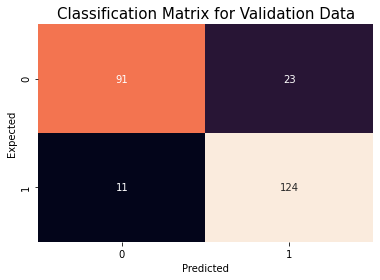

Training Sensitivity       0.945
Valuation Sensitivity      0.919 

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       114
           1       0.84      0.92      0.88       135

    accuracy                           0.86       249
   macro avg       0.87      0.86      0.86       249
weighted avg       0.87      0.86      0.86       249

Specificity:  0.892
/n
Training Sensitivity:    0.945
Valuation Sensitivity:   0.919
Test Sensitivity:        0.939 



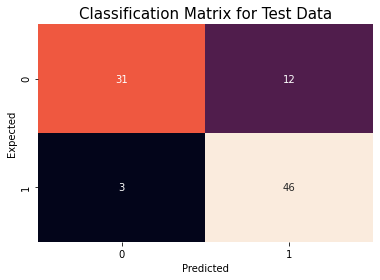

Test Results:               precision    recall  f1-score   support

           0       0.91      0.72      0.81        43
           1       0.79      0.94      0.86        49

    accuracy                           0.84        92
   macro avg       0.85      0.83      0.83        92
weighted avg       0.85      0.84      0.83        92

Specificity:  0.912


In [153]:
rf1bag = RandomForestClassifier(max_depth=11, max_features=8, min_samples_leaf=7, min_samples_split=20, n_estimators=60, random_state = 666)
rfbag1 = BaggingClassifier(base_estimator=rf1bag, n_estimators=100)
scores = cross_val_score(rfbag1, Xb_train_kpca, yb_train_kpca, cv=5, scoring = "recall")
scores.mean()

rfbag1.fit(Xb_train_kpca, yb_train_kpca)

train_pred_rfbag1 = rfbag1.predict(Xb_train_kpca)
val_pred_rfbag1 = rfbag1.predict(Xb_val_kpca)
test_pred_rfbag1 = rfbag1.predict(Xb_test_kpca)

modelOutput(yb_train_kpca, train_pred_rfbag1, yb_val_kpca, val_pred_rfbag1)
print("/n")
finalOutput(yb_train_kpca, train_pred_rfbag1, yb_val_kpca, val_pred_rfbag1, yb_test_kpca, test_pred_rfbag1)

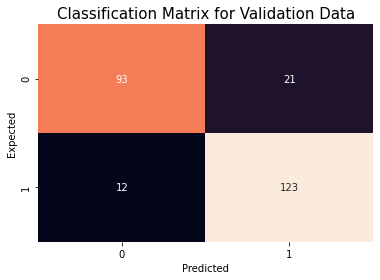

Training Sensitivity       0.911
Valuation Sensitivity      0.911 

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       114
           1       0.85      0.91      0.88       135

    accuracy                           0.87       249
   macro avg       0.87      0.86      0.87       249
weighted avg       0.87      0.87      0.87       249

Specificity:  0.886
/n
Training Sensitivity:    0.911
Valuation Sensitivity:   0.911
Test Sensitivity:        0.837 



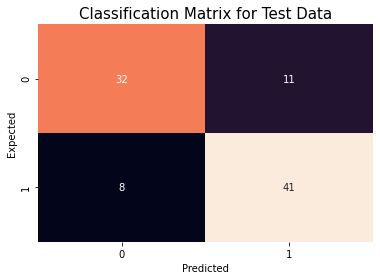

Test Results:               precision    recall  f1-score   support

           0       0.80      0.74      0.77        43
           1       0.79      0.84      0.81        49

    accuracy                           0.79        92
   macro avg       0.79      0.79      0.79        92
weighted avg       0.79      0.79      0.79        92

Specificity:  0.8


In [154]:
rf2bag = RandomForestClassifier(max_depth=11, max_features=3, min_samples_leaf=5, min_samples_split=25, n_estimators=60, random_state = 666)
rfbag2 = BaggingClassifier(base_estimator=rf2bag, n_estimators=100)
scores = cross_val_score(rfbag2, Xb_train_pca, yb_train_pca, cv=5, scoring = "recall")
scores.mean()

rfbag2.fit(Xb_train_pca, yb_train_pca)

train_pred_rfbag2 = rfbag2.predict(Xb_train_pca)
val_pred_rfbag2 = rfbag2.predict(Xb_val_pca)
test_pred_rfbag2 = rfbag2.predict(Xb_test_pca)

modelOutput(yb_train_pca, train_pred_rfbag2, yb_val_pca, val_pred_rfbag2)
print("/n")
finalOutput(yb_train_pca, train_pred_rfbag2, yb_val_pca, val_pred_rfbag2, yb_test_pca, test_pred_rfbag2)

# Conclusion

In [155]:
# Create a table here
data = {"Classifier models": ["K Nearest PCA","Logistic Regression PCA", "Gaussian Naive Bayesian PCA","Decision Tree", "Random Forest PCA", "Random Forest KPCA with Bagging",
                              "adaBoost decision stumps", "adaBoost Gaussian Naive Bayes", "adaBoost Perceptron", "Gradient Boost","Gradient Boost KPCA",
                              "Kernel RBF SVC","KernelPCA RBF SVC with Dummies","Linear SVC"],
       "Specificity": ["0.80", "0.86","0.78","0.63","0.81","0.91", "0.77","0.78","0.59","0.79","0.82","0.74","0.70","0.82"],
       "Sensitivity": ["0.82","0.90","0.82","0.75","0.86","0.94","0.89","0.85","0.58","0.83","0.89","0.75","0.90","0.91"],
       "f1-score" :   ["0.82","0.84","0.79","0.80","0.80","0.87","0.86","0.85","0.62","0.84","0.87","0.78","0.83","0.89"],
        "Accuracy" :  ["0.82","0.82","0.77","0.76","0.77","0.85","0.84","0.82","0.59","0.82","0.86","0.75","0.80","0.87"]}
Perfomance_Models_Table = pd.DataFrame(data)
Perfomance_Models_Table 

,Classifier models,Specificity,Sensitivity,f1-score,Accuracy
0,K Nearest PCA,0.80,0.82,0.82,0.82
1,Logistic Regression PCA,0.86,0.90,0.84,0.82
2,Gaussian Naive Bayesian PCA,0.78,0.82,0.79,0.77
3,Decision Tree,0.63,0.75,0.80,0.76
4,Random Forest PCA,0.81,0.86,0.80,0.77
5,Random Forest KPCA with Bagging,0.91,0.94,0.87,0.85
6,adaBoost decision stumps,0.77,0.89,0.86,0.84
7,adaBoost Gaussian Naive Bayes,0.78,0.85,0.85,0.82
8,adaBoost Perceptron,0.59,0.58,0.62,0.59
9,Gradient Boost,0.79,0.83,0.84,0.82


After creating and testing all of our Classifiers, we can see that our most accurate Classifiers are Random Forest with KPCA and Bagging with 94% sensitivity and 85% accuracy and Linear SVC at 87% sensitivity and accuracy. The sensitivity score is an important metric for health data, making Random Forest the stronger model. Especially for detecting heart disease, it is better to accurately predict positive cases over negative cases. However, that is not the case in Linear SVC, as it predicts both very well. 

Our other models were less performative, but some, such as Logistic Regression and Naive Bayes, are still good models. Applying our PCA and KPCA data sets to the models managed to improve most of their performances as well. We extracted feature importance from these models, and these results show that the models are accurate enough to believe in the strength of the features identified. The results of feature importance verified our hypothesis that Chest Pain is highly related to heart disease and also pointed out other factors that we had not hypthosized to be as strong as they are.

One important finding is that the dataset location is one of the more important features in the dataset. Going into our research, we knew that only one out of four of the datasets had been studied in the past. This indicates that the data from each location is different and can point to different important factors. Though we have not uncovered new features that point to heart disease that were not already known, future studies may investigate further the difference between each dataset. It is possible that certain features in one location indicate heart disease more strongly than in other locations. If this is the case, there may be other related factors that could be added to future datasets to account for this difference.

Another important finding is the importance of chest pain type as an indicator of heart disease. This is a known factor, which works against us in this case, as it usually means that a patient has already expressed concerns. If this model is meant to indicate heart disease before it would initially be caught, then using a factor that a patient must have already brought up means the model would not save much hardship for the patient. Luckily, there are other important features such as cholesterol, resting blood pressure, and exercise-induced angina, followed by age and the number of major vessels colored by fluoroscopy, all of which can be used to indicate heart disease. Many of these factors can be caught without the patient expressing concern, and thus, can be used as predictive features. 

The established correlation between heart disease and exercise-induced angina enables physicians to confidently recommend aggressive treatment to patients to improve their outcomes.

As our analysis stands, little new knowledge has been uncovered except the important of the location feature.  The dataset barely delves into the patient profile (i.e. eating, exercise, and smoking habits), details related to location (i.e. cultural and environmental aspects, medical training and protocol), and breadth of geographic locations.  With the additional information, a more expanded dataset with additional meaningful features and a greater number of instances has the potential to deliver more expansive machine learning findings to better inform medical professionals of risk factors associated with heart disease.

As expected ensembled methods tend to have better perfomance than others, as mentioned above the model that brought the best recall was an emsebled method using random forest as estimator. However, not always the best model is obtanined using ensebled algorithms, all depend on the data. 

**Contributions.**

* Edward - AdaBoost, GradianBoost, SVM Classifier, Chi2 Test, Data visualization, final metrics table.
* Eric - Wrote the write-up for the Final Project Milestone and added Comments/Markdown to the rest of the document. Data Preprocessing, Cleaning, Transformation, and Exploratory Data Analysis. Worked on additional Random Forest algorithm. PCA and KPCA creation and testing on all models.
* Lesley - Wrote-up initial milestone.  Wrote Overview in this document.  Initial Pre-processing, Cleaning, and Transformation that Eric took to completion. Exploratory Data Analysis visualizations (specifically violin plots, correlations, initial variable histograms). Modeling of K Nearest Neighbors, Logistic Regression, Naive Bayes, Decision Tree and Random Forest, Bagging, some KPCA work.  Jointly modeled the above techniques with (K)PCA with Eric.  Modeling with abbreviated Stages 1-4 dataset not included here.
* Smruthi- Worked on Data visualization/Exploratory analysis, created visualizations comparing variables based on gender and examining other key variables, bagging analysis.


# **References**

Assistance with coding:
*   scikit-learn.org
*   stackoverflow.com
*   DSC540 lecture and coding material

Dataset and information about dataset:
*   https://www.kaggle.com/redwankarimsony/heart-disease-data
*   https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/


2.   Reasearch papers and web sites:


1. A. H. Chen, S. Y. Huang, P. S. Hong, C. H. Cheng and E. J. Lin, "HDPS: Heart disease
prediction system," 2011 Computing in Cardiology, 2011, pp. 557-560.
2. C. Beulah ChristalinLathaS. CarolinJeeva. Improving the accuracy of prediction of heart
disease risk based on ensemble classification techniques. https://doi.org/10.1016/
j.imu.2019.100203
3. Centers for Disease Control and Prevention. (2020, September 8). Heart Disease Facts.
Centers for Disease Control and Prevention. https://www.cdc.gov/heartdisease/facts.htm.
4. Centers for Disease Control and Prevention. (2021, March 1). FastStats - Leading Causes
of Death. Centers for Disease Control and Prevention. https://www.cdc.gov/nchs/fastats/
leading-causes-of-death.htm.
5. Jabbar, M. A., Deekshatulu, B., & Chandra, P. (2013). Classification of heart disease
Using K- nearest neighbor and genetic algorithm. Procedia Technology, 10, 85-94.
doi:10.1016/j.protcy.2013.12.340
6. Khanna D., Sahu R., Baths V., Deshpande B. (2015). Comparative Study of
Classification Techniques (SVM, Logistic Regression, and Neural Networks) to Predict
the Prevalence of Heart Disease. http://www.ijmlc.org/vol5/544-C039.pdf
